In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# 1. Data Import and check


In [2]:
BRCA=pd.read_csv("/Users/jaimecastro/Desktop/4º Biomedicina/1º Cuatri /Ciencia de datos/Datos.tsv", sep='\t')

In [3]:
BRCA.head()

,barcode,clinical_data_date_of_initial_pathologic_diagnosis,clinical_data_days_to_death,clinical_data_days_to_last_followup,clinical_data_days_to_last_known_alive,clinical_data_ER+,clinical_data_ethnicity,clinical_data_gender,clinical_data_HER2+,clinical_data_number_of_lymph_nodes,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,TCGA-A2-A0D0,2008.0,NaN,2048.0,NaN,0.0,not hispanic or latino,female,0.0,0.0,...,60.0,TCGA,BRCA,1,8.0,7.0,7.0,7.0,324bcba2-f6a4-45a6-807c-215bdffcca21,4ff6b8e5-703b-400f-920a-104f56e0f874
1,TCGA-BH-A0BC,2007.0,NaN,974.0,NaN,1.0,NaN,female,0.0,12.0,...,60.0,TCGA,BRCA,1,9.0,7.0,8.0,7.0,327a2395-85c8-42e1-9638-8e037a1723ed,NaN
2,TCGA-BH-A28Q,2010.0,NaN,1119.0,NaN,1.0,not hispanic or latino,female,0.0,2.0,...,46.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,32861b48-83f5-43a3-bb54-45215ad2c5d6,NaN
3,TCGA-B6-A0I2,1995.0,NaN,4361.0,NaN,NaN,not hispanic or latino,female,0.0,0.0,...,45.0,TCGA,BRCA,1,10.0,10.0,10.0,10.0,328dfcb0-b5ae-43f2-bc87-dad0ab3df9e7,NaN
4,TCGA-5T-A9QA,2013.0,NaN,303.0,NaN,1.0,not hispanic or latino,female,0.0,NaN,...,52.0,TCGA,BRCA,1,8.0,6.0,8.0,6.0,2fd36838-5a83-433e-ac80-b1f77448e5aa,NaN


In [4]:
BRCA.tail()

,barcode,clinical_data_date_of_initial_pathologic_diagnosis,clinical_data_days_to_death,clinical_data_days_to_last_followup,clinical_data_days_to_last_known_alive,clinical_data_ER+,clinical_data_ethnicity,clinical_data_gender,clinical_data_HER2+,clinical_data_number_of_lymph_nodes,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
1093,TCGA-BH-A202,2011.0,NaN,795.0,NaN,1.0,not hispanic or latino,female,1.0,0.0,...,60.0,TCGA,BRCA,1,8.0,7.0,8.0,7.0,e7a00d67-2c26-4d1f-bd17-35f659e88bc1,NaN
1094,TCGA-A2-A3XZ,2009.0,NaN,1532.0,NaN,0.0,not hispanic or latino,female,1.0,0.0,...,46.0,TCGA,BRCA,1,8.0,8.0,8.0,8.0,fe7f74b8-20f4-4471-91dc-4cca8c68e5c0,NaN
1095,TCGA-E9-A295,2011.0,NaN,375.0,NaN,1.0,not hispanic or latino,female,1.0,0.0,...,71.0,TCGA,BRCA,1,8.0,6.0,7.0,6.0,fec0da58-1047-44d2-b6d1-c18cceed43dc,NaN
1096,TCGA-C8-A26W,2010.0,NaN,381.0,NaN,1.0,not hispanic or latino,female,1.0,NaN,...,58.0,TCGA,BRCA,1,9.0,8.0,9.0,7.0,ff0f875f-113a-4c0f-8c0a-4259cd496e6d,NaN
1097,TCGA-BH-A0B2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TCGA,BRCA,0,NaN,NaN,NaN,NaN,57a1604c-60b7-4b30-a75e-f70939532c5c,NaN


In [5]:
BRCA.columns

Index(['barcode', 'clinical_data_date_of_initial_pathologic_diagnosis',
       'clinical_data_days_to_death', 'clinical_data_days_to_last_followup',
       'clinical_data_days_to_last_known_alive', 'clinical_data_ER+',
       'clinical_data_ethnicity', 'clinical_data_gender',
       'clinical_data_HER2+', 'clinical_data_number_of_lymph_nodes',
       'clinical_data_PAM50MRNA', 'clinical_data_pathologic_stage',
       'clinical_data_pathology_M_stage', 'clinical_data_pathology_N_stage',
       'clinical_data_pathology_T_stage', 'clinical_data_PR+',
       'clinical_data_race', 'clinical_data_radiation_therapy',
       'clinical_data_TNBC', 'clinical_data_tumor_tissue_site',
       'clinical_data_vital_status', 'clinical_data_years_to_birth',
       'datasource', 'disease', 'expData', 'ips_ctla4_neg_pd1_neg',
       'ips_ctla4_neg_pd1_pos', 'ips_ctla4_pos_pd1_neg',
       'ips_ctla4_pos_pd1_pos', 'patient_uuid', 'slides_0'],
      dtype='object')

In [6]:
BRCA.shape

(1098, 31)

In [7]:
BRCA.describe()

,clinical_data_date_of_initial_pathologic_diagnosis,clinical_data_days_to_death,clinical_data_days_to_last_followup,clinical_data_days_to_last_known_alive,clinical_data_ER+,clinical_data_HER2+,clinical_data_number_of_lymph_nodes,clinical_data_PR+,clinical_data_TNBC,clinical_data_vital_status,clinical_data_years_to_birth,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos
count,1095.000000,151.000000,945.000000,2.000000,1020.000000,1027.000000,929.000000,1017.000000,1069.000000,1097.000000,1082.000000,1098.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,2007.873059,1644.668874,1182.713228,1655.500000,0.773529,0.157741,2.362756,0.673550,0.161833,0.138560,58.596118,0.995446,7.911253,6.752059,7.494968,6.314730
std,4.303537,1315.755792,1159.880556,1301.783584,0.418752,0.364676,4.633874,0.469145,0.368470,0.345644,13.193799,0.067358,0.831165,1.083428,0.918483,1.254929
min,1988.000000,116.000000,-7.000000,735.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,5.000000,4.000000,5.000000,3.000000
25%,2007.000000,700.500000,440.000000,1195.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,1.000000,7.000000,6.000000,7.000000,5.000000
50%,2009.000000,1272.000000,761.000000,1655.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,59.000000,1.000000,8.000000,7.000000,7.000000,6.000000
75%,2010.000000,2367.000000,1572.000000,2115.750000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,68.000000,1.000000,8.000000,7.000000,8.000000,7.000000
max,2013.000000,7455.000000,8605.000000,2576.000000,1.000000,1.000000,35.000000,1.000000,1.000000,1.000000,90.000000,1.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
BRCA1= BRCA.drop(["slides_0","patient_uuid","expData","disease","clinical_data_tumor_tissue_site","barcode"], axis=1, inplace=True)

In [9]:
BRCA.drop(["datasource"], axis=1, inplace=True)

# 2. Exploratory Data Analysis (EDA)

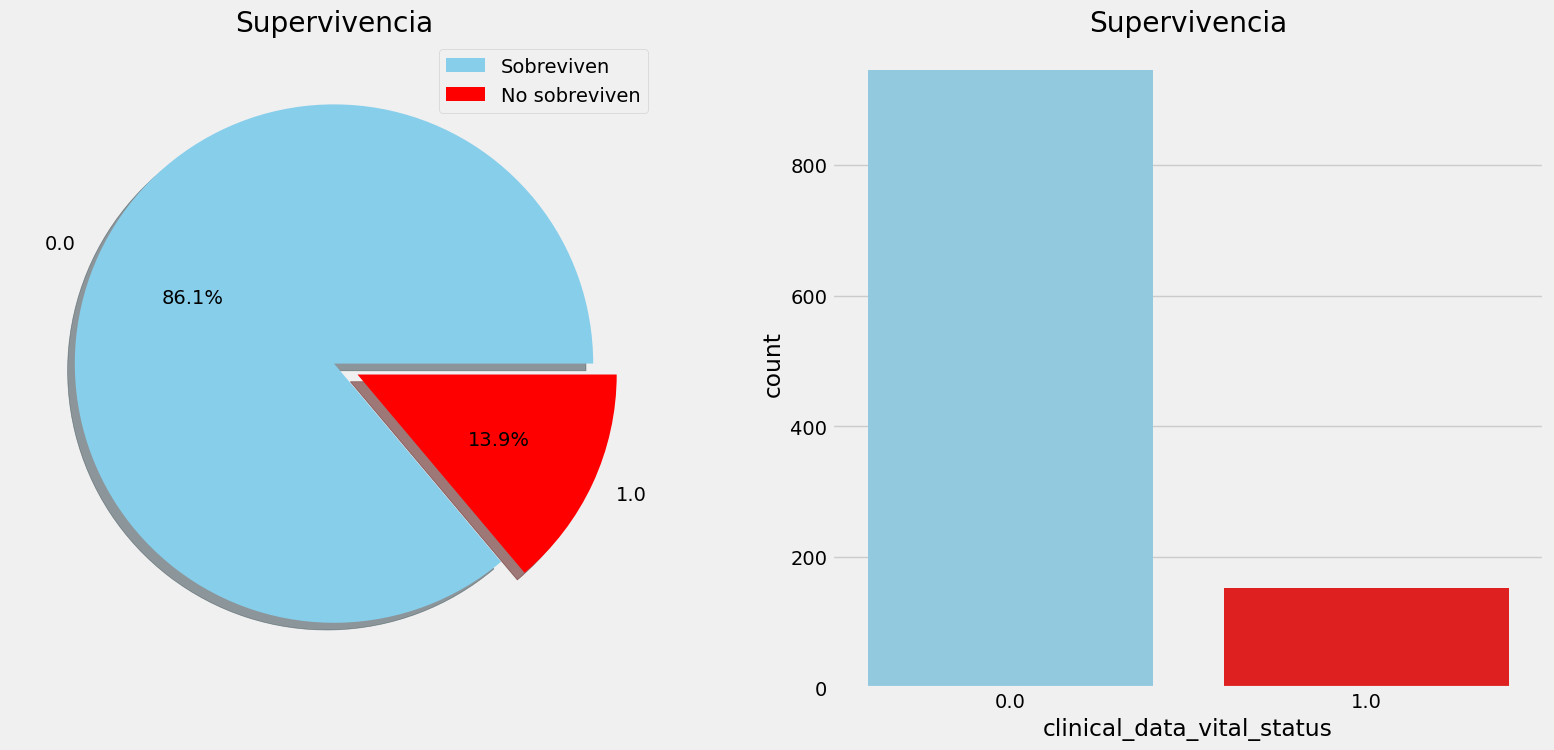

In [10]:
# Observo la distribución de mi Target: Supervivencia (clinical_data_vital_status)

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar colores
colors = ["skyblue", "red"]

# Crear subgráficos
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de pastel
BRCA['clinical_data_vital_status'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Supervivencia')
ax[0].set_ylabel('')
ax[0].legend(labels=["Sobreviven", "No sobreviven"])

# Gráfico de barras
sns.countplot(x='clinical_data_vital_status', data=BRCA, ax=ax[1], palette=colors)
ax[1].set_title("Supervivencia")

# Mostrar el gráfico
plt.show()


In [11]:
print(BRCA['clinical_data_vital_status'].value_counts())



0.0    945
1.0    152
Name: clinical_data_vital_status, dtype: int64


# 2.1 Observamos relación de  variables categóricas con nuestro target

PAM50MRNA

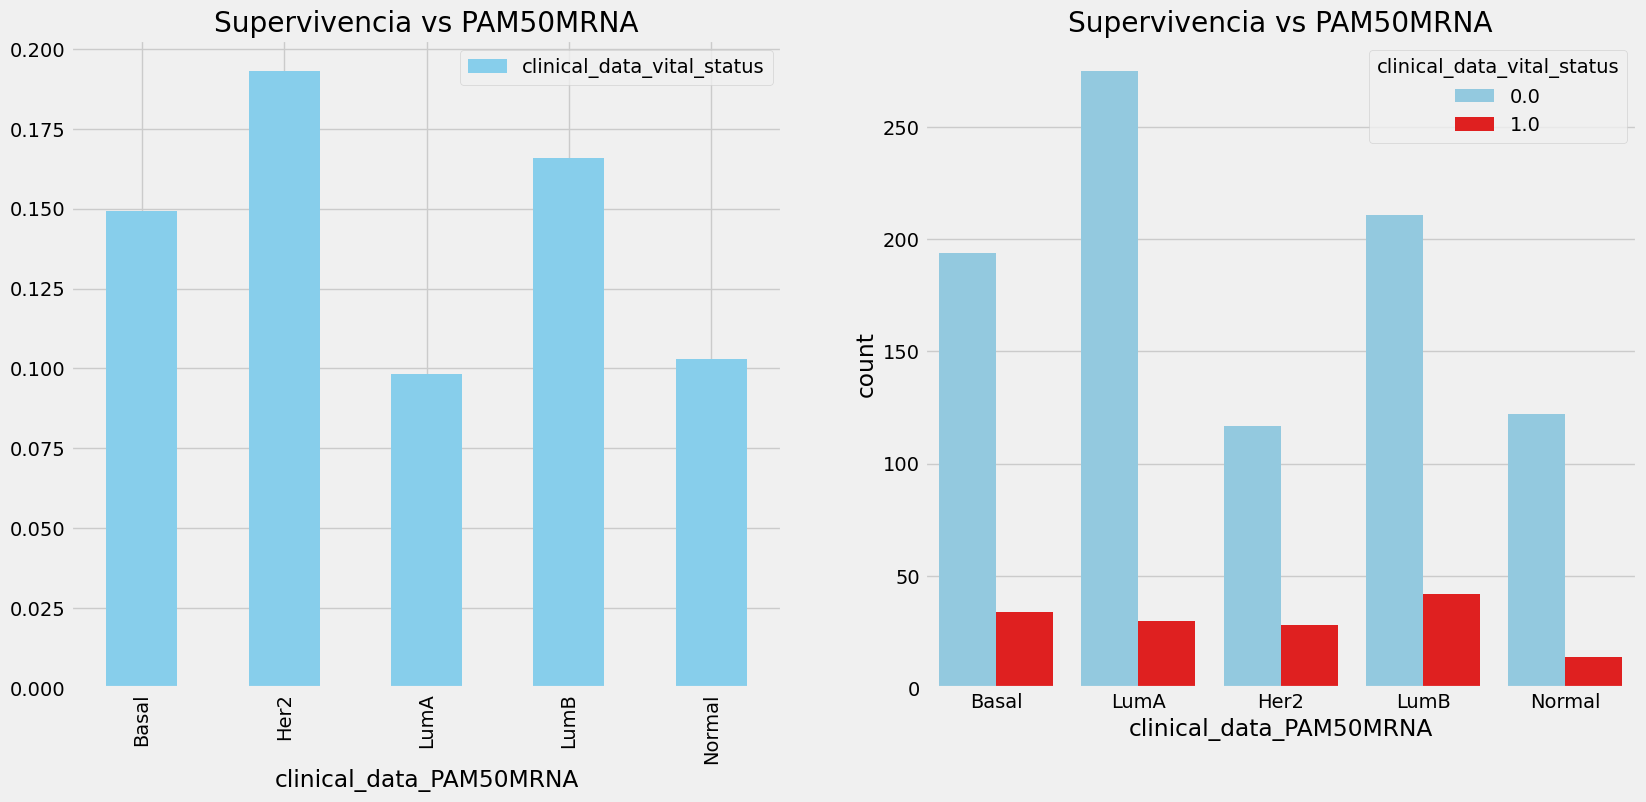

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Observemos las variables no categóricas en relación con nuestro target: Raza, Etnia y PAM50MRNA

# Crear subgráficos
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Definir colores
colors = ["skyblue", "red"]

# Gráfico de barras
BRCA[['clinical_data_PAM50MRNA', 'clinical_data_vital_status']].groupby(['clinical_data_PAM50MRNA']).mean().plot.bar(ax=ax[0], color=colors)
ax[0].set_title('Supervivencia vs PAM50MRNA')

# Gráfico de conteo
sns.countplot(x='clinical_data_PAM50MRNA', hue='clinical_data_vital_status', data=BRCA, ax=ax[1], palette=colors)
ax[1].set_title('Supervivencia vs PAM50MRNA')

# Mostrar el gráfico
plt.show()







In [13]:

BRCA.groupby(["clinical_data_PAM50MRNA","clinical_data_vital_status"])["clinical_data_vital_status"].count()


clinical_data_PAM50MRNA  clinical_data_vital_status
Basal                    0.0                           194
                         1.0                            34
Her2                     0.0                           117
                         1.0                            28
LumA                     0.0                           275
                         1.0                            30
LumB                     0.0                           211
                         1.0                            42
Normal                   0.0                           122
                         1.0                            14
Name: clinical_data_vital_status, dtype: int64

RAZA

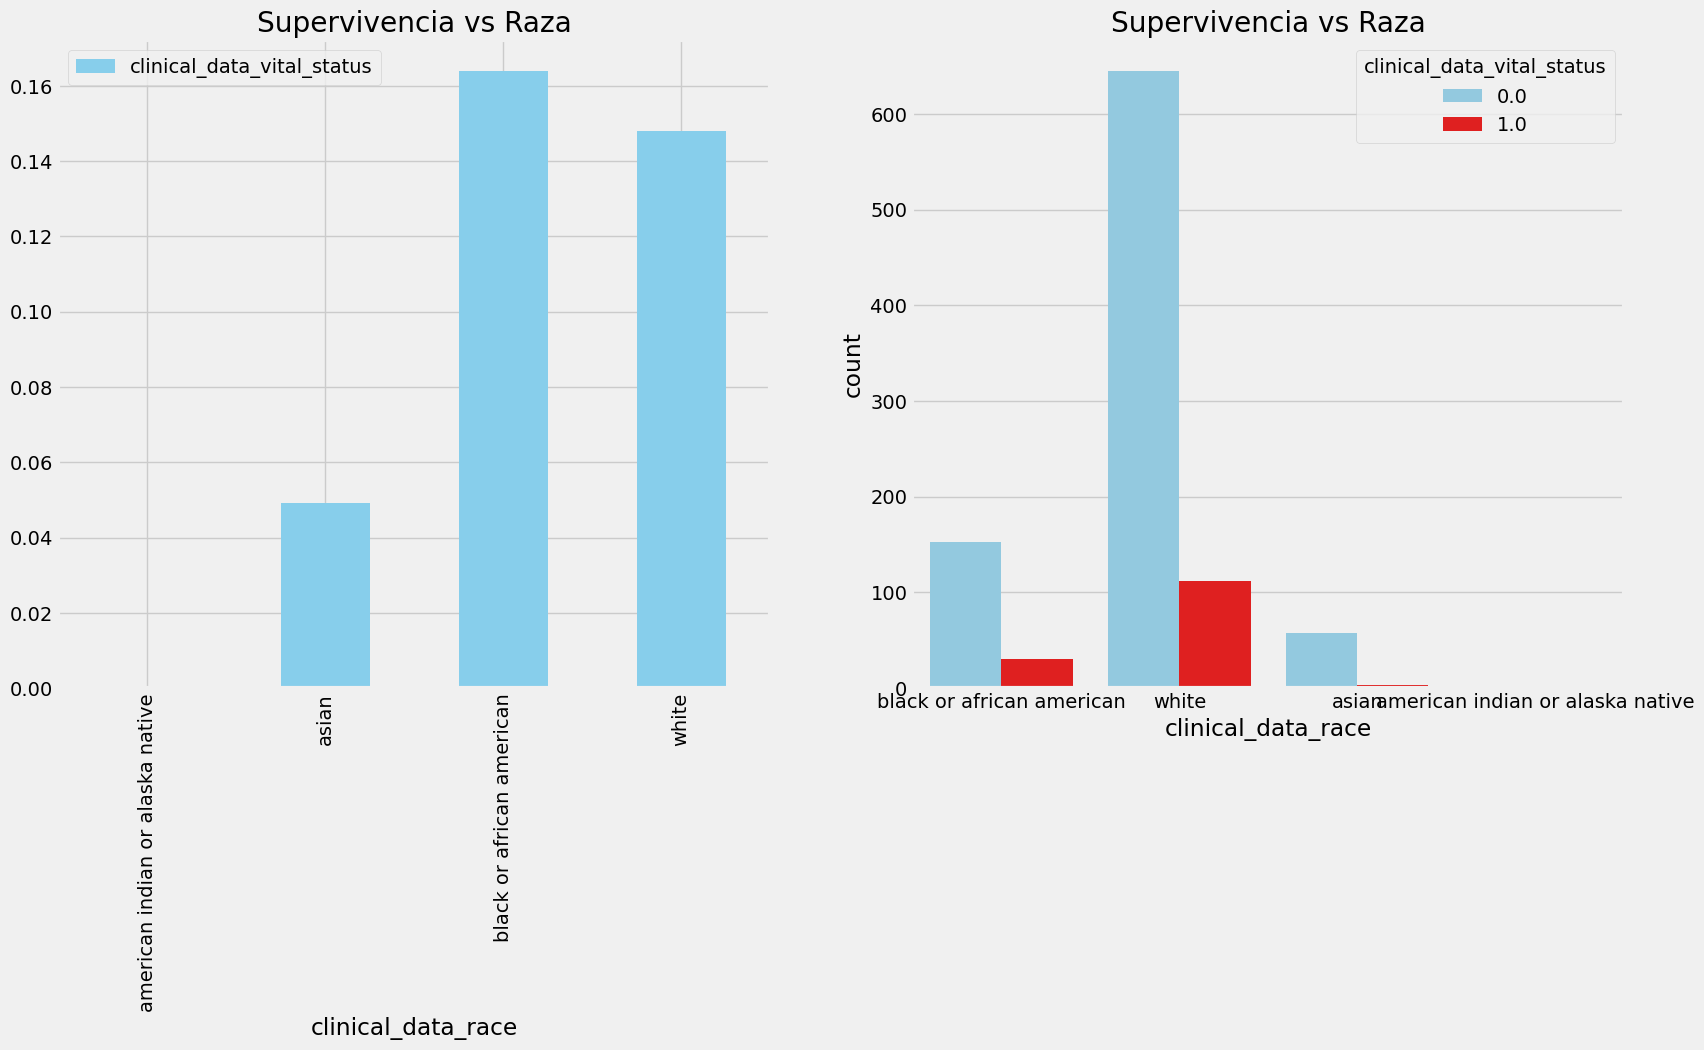

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Observemos las variables no categóricas en relación con nuestro target: Raza, Etnia y PAM50MRNA

# Crear subgráficos
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Definir colores
colors = ["skyblue", "red"]

# Gráfico de barras
BRCA[['clinical_data_race', 'clinical_data_vital_status']].groupby(['clinical_data_race']).mean().plot.bar(ax=ax[0], color=colors)
ax[0].set_title('Supervivencia vs Raza')

# Gráfico de conteo
sns.countplot(x='clinical_data_race', hue='clinical_data_vital_status', data=BRCA, ax=ax[1], palette=colors)
ax[1].set_title('Supervivencia vs Raza')

# Mostrar el gráfico
plt.show()


In [15]:
#Observemos las variables no categóricas en relación con nuestro target: Raza, Etnia y PAM50MRNA
BRCA.groupby(["clinical_data_race", "clinical_data_vital_status"])["clinical_data_vital_status"].count()

clinical_data_race                clinical_data_vital_status
american indian or alaska native  0.0                             1
asian                             0.0                            58
                                  1.0                             3
black or african american         0.0                           153
                                  1.0                            30
white                             0.0                           645
                                  1.0                           112
Name: clinical_data_vital_status, dtype: int64

ETNIA

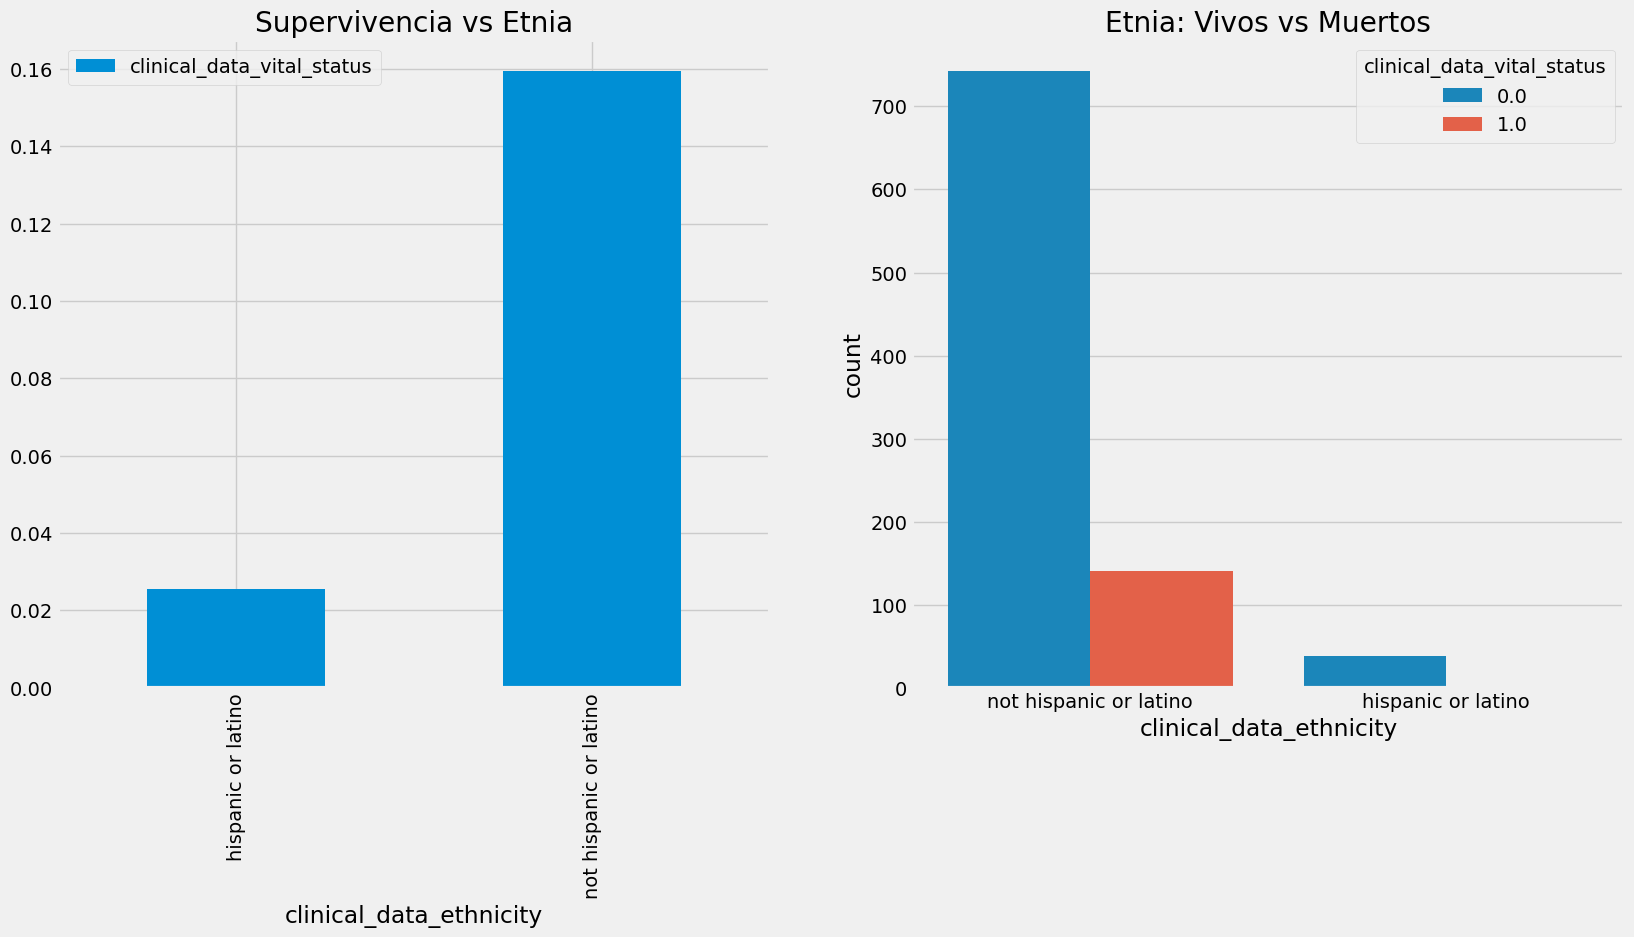

In [16]:
#Observemos las variables no categóricas en relación con nuestro target: Raza, Etnia y PAM50MRNA
f,ax=plt.subplots(1,2,figsize=(18,8))
BRCA[['clinical_data_ethnicity','clinical_data_vital_status']].groupby(['clinical_data_ethnicity']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Supervivencia vs Etnia')
sns.countplot(x='clinical_data_ethnicity',hue='clinical_data_vital_status',data=BRCA,ax=ax[1])
ax[1].set_title('Etnia: Vivos vs Muertos')
plt.show()


In [17]:
#Observemos las variables no categóricas en relación con nuestro target: Raza, Etnia y PAM50MRNA
BRCA.groupby(["clinical_data_ethnicity","clinical_data_vital_status"])["clinical_data_vital_status"].count()

clinical_data_ethnicity  clinical_data_vital_status
hispanic or latino       0.0                            38
                         1.0                             1
not hispanic or latino   0.0                           743
                         1.0                           141
Name: clinical_data_vital_status, dtype: int64

# 2.2 Analizamos Variables Continuas

EDAD

In [18]:
#Relación de muerte con la edad--> Variable continua, hay que dividirla en grupos
print("Paciente de mayor edad:",BRCA['clinical_data_years_to_birth'].max(),"Años")
print("Paciente de menor edad:", BRCA['clinical_data_years_to_birth'].min(),"Años")
print("Edad media:",BRCA['clinical_data_years_to_birth'].mean(),"Años")

Paciente de mayor edad: 90.0 Años
Paciente de menor edad: 26.0 Años
Edad media: 58.59611829944547 Años


<Axes: xlabel='clinical_data_years_to_birth', ylabel='Density'>

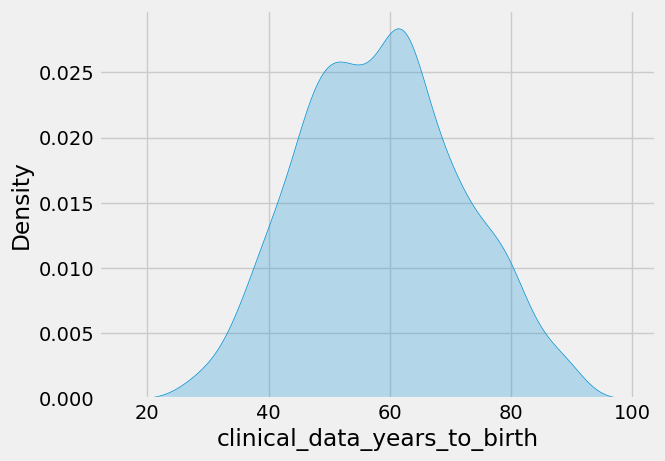

In [19]:
# Density Plot
sns.kdeplot(BRCA["clinical_data_years_to_birth"], shade=True)


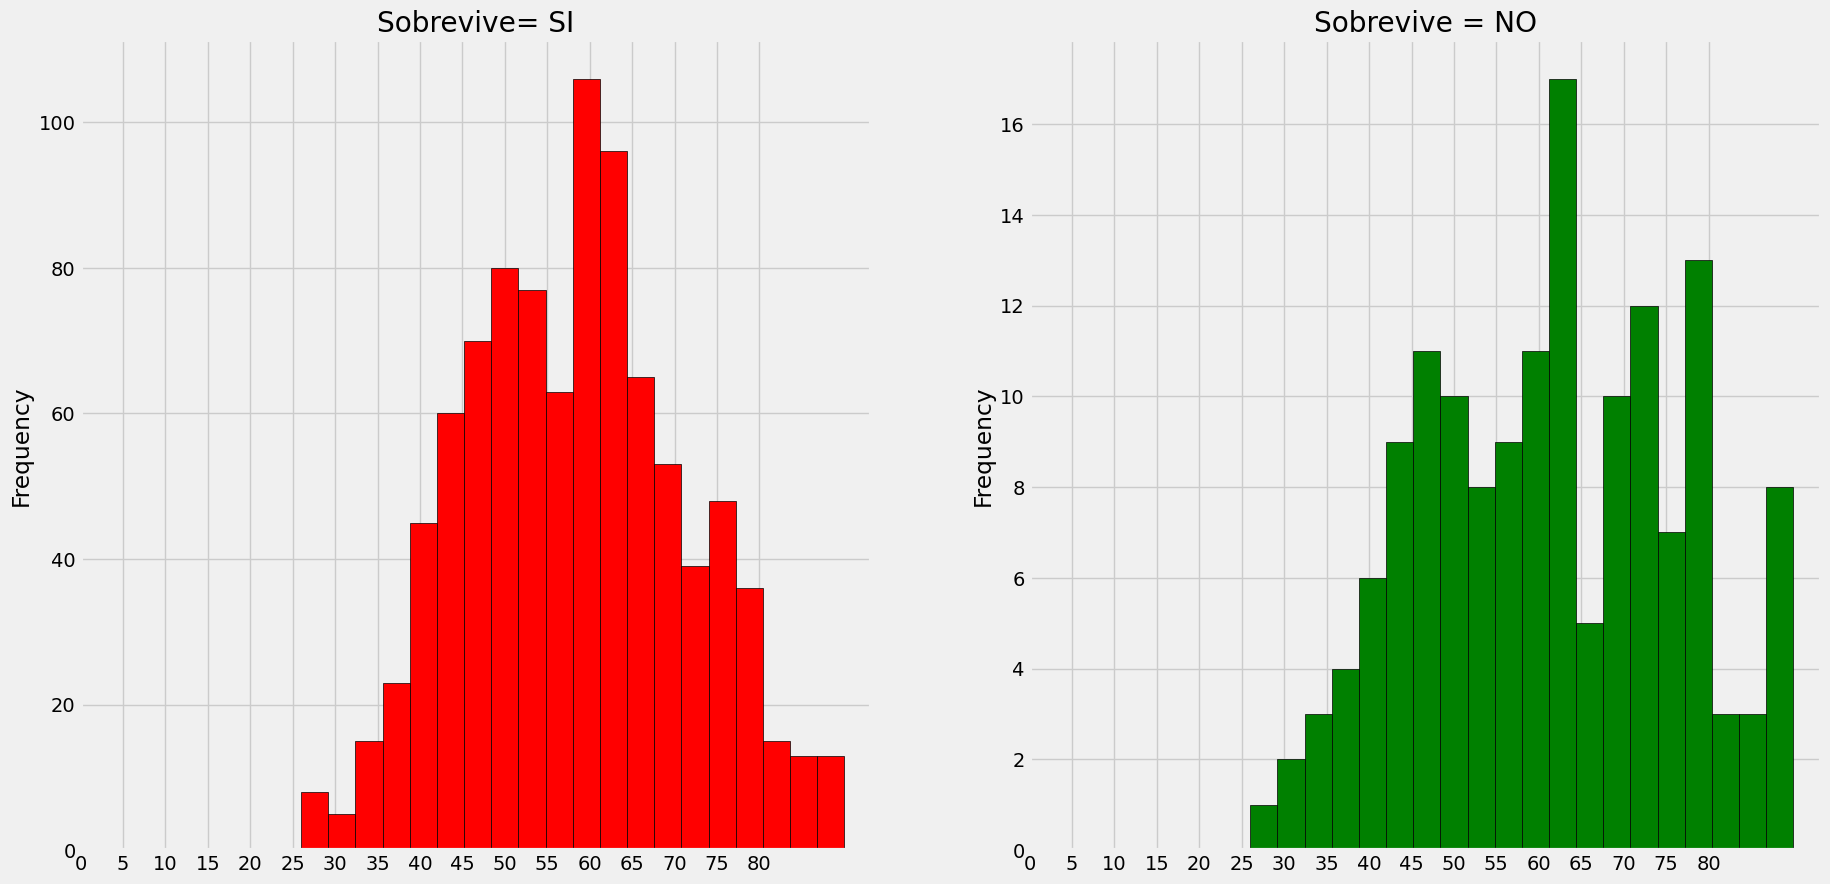

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
BRCA[BRCA['clinical_data_vital_status']==0].clinical_data_years_to_birth.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Sobrevive= SI')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
BRCA[BRCA["clinical_data_vital_status"]==1].clinical_data_years_to_birth.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Sobrevive = NO')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# 2.3 Análisis de variables cualitativas

ER+

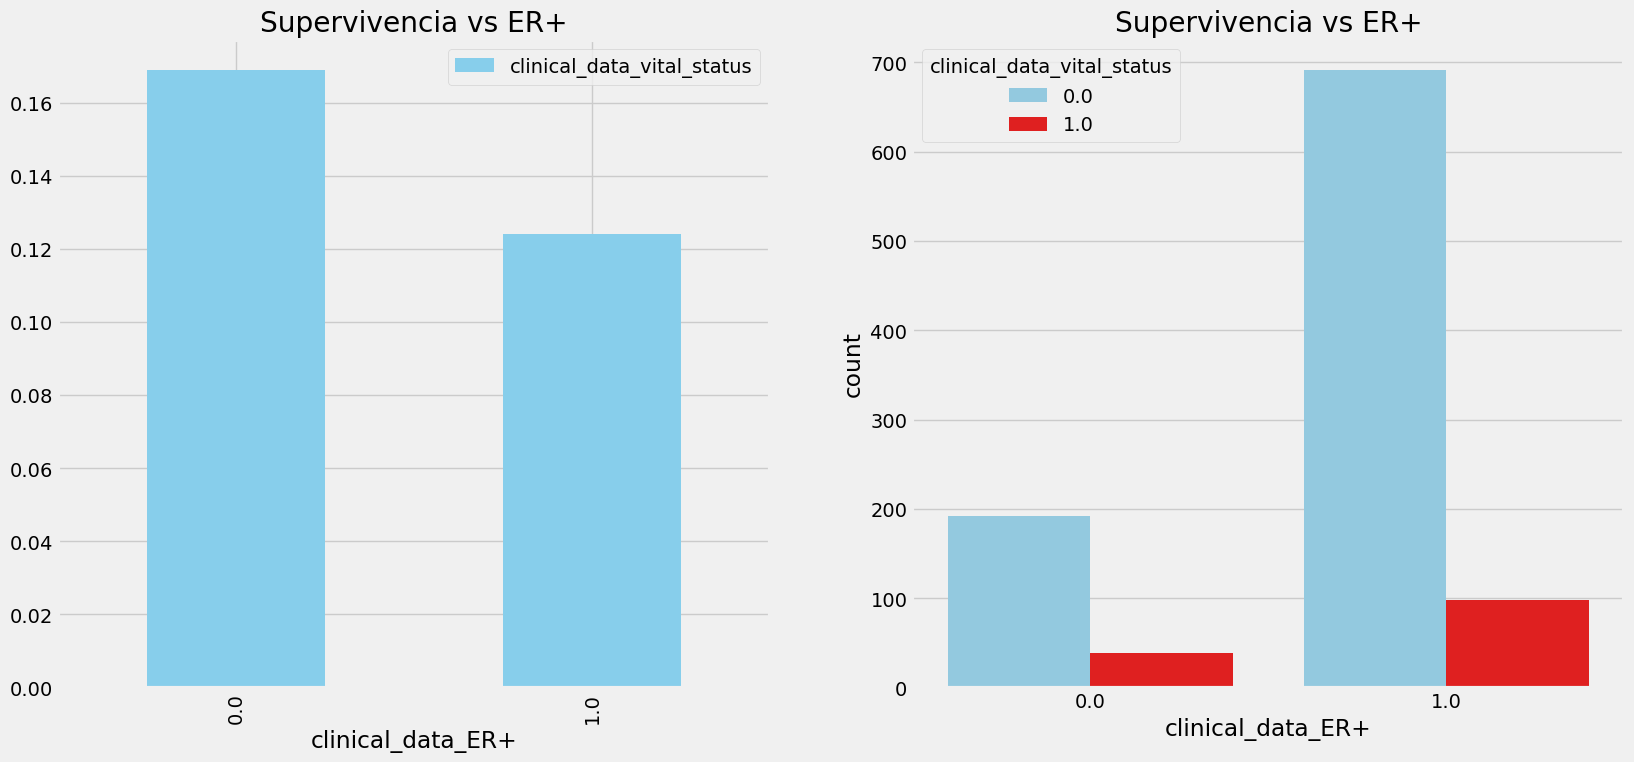

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras para Supervivencia vs ER+
BRCA[['clinical_data_ER+', 'clinical_data_vital_status']].groupby(['clinical_data_ER+']).mean().plot.bar(ax=ax[0], color=['skyblue', 'red'])
ax[0].set_title('Supervivencia vs ER+')

# Countplot para Supervivencia vs ER+
sns.countplot(x='clinical_data_ER+', hue='clinical_data_vital_status', data=BRCA, ax=ax[1], palette=['skyblue', 'red'])
ax[1].set_title('Supervivencia vs ER+')

plt.show()


In [22]:
BRCA.groupby(['clinical_data_ER+','clinical_data_vital_status'])['clinical_data_vital_status'].count()

clinical_data_ER+  clinical_data_vital_status
0.0                0.0                           192
                   1.0                            39
1.0                0.0                           691
                   1.0                            98
Name: clinical_data_vital_status, dtype: int64

In [23]:
import pandas as pd

# Agrupar y contar los valores
count_table = pd.crosstab(index=[BRCA['clinical_data_ER+'], BRCA['clinical_data_vital_status']], columns="Count")

# Mostrar la tabla
print(count_table)


col_0                                         Count
clinical_data_ER+ clinical_data_vital_status       
0.0               0.0                           192
                  1.0                            39
1.0               0.0                           691
                  1.0                            98


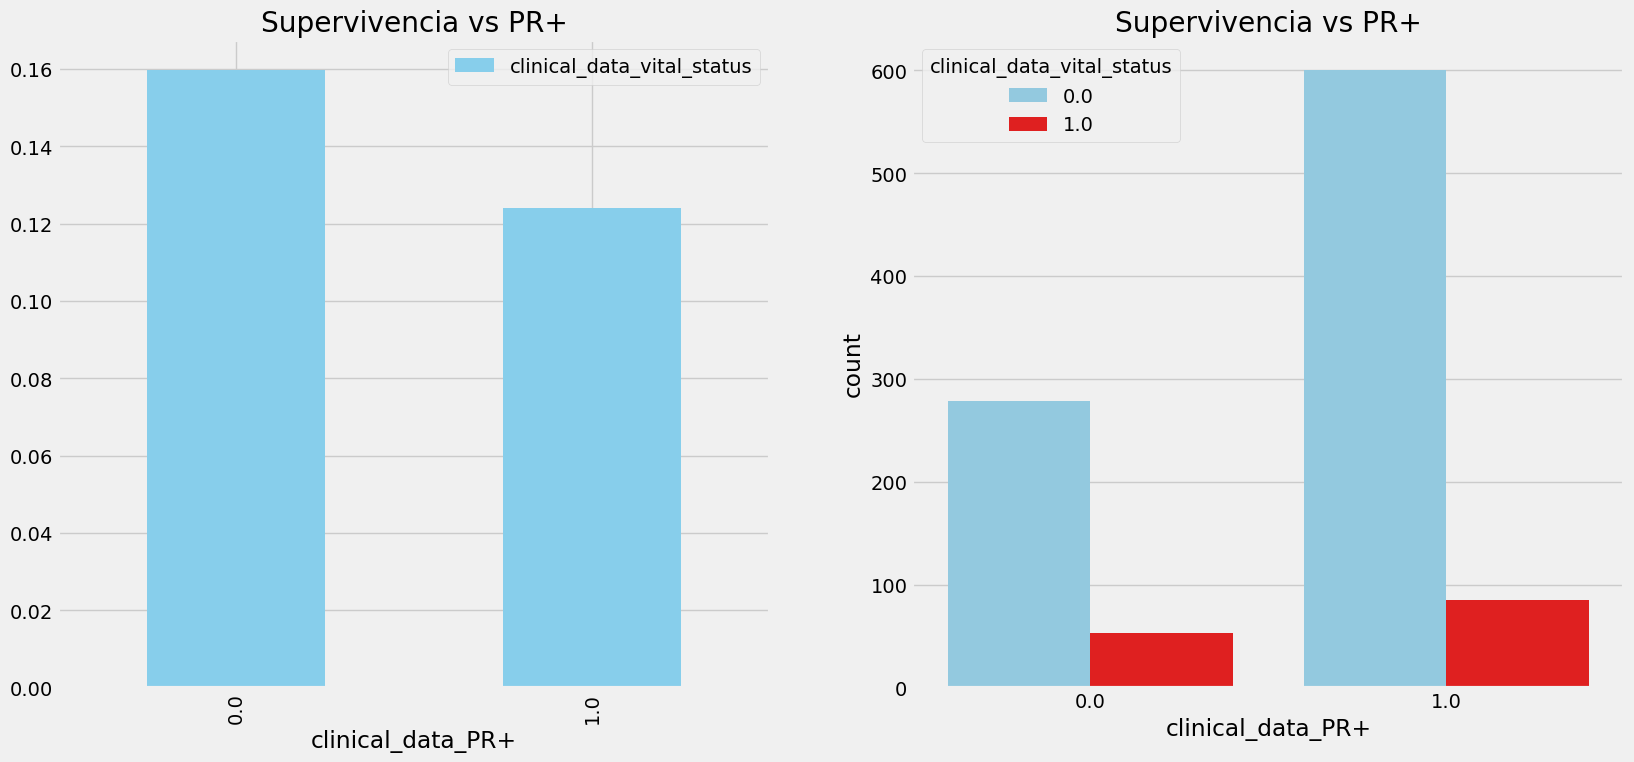

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la paleta de colores
colors = ["skyblue", "red"]

# Gráfico de barras
sns.set_palette(colors)
f, ax = plt.subplots(1, 2, figsize=(18, 8))
BRCA[['clinical_data_PR+', 'clinical_data_vital_status']].groupby(['clinical_data_PR+']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Supervivencia vs PR+')

# Countplot
sns.countplot(x='clinical_data_PR+', hue='clinical_data_vital_status', data=BRCA, ax=ax[1])
ax[1].set_title('Supervivencia vs PR+')

# Mostrar los gráficos
plt.show()


In [25]:
BRCA.groupby(['clinical_data_PR+','clinical_data_vital_status'])['clinical_data_vital_status'].count()

clinical_data_PR+  clinical_data_vital_status
0.0                0.0                           279
                   1.0                            53
1.0                0.0                           600
                   1.0                            85
Name: clinical_data_vital_status, dtype: int64

In [26]:
import pandas as pd

# Agrupar y contar los valores
count_table = pd.crosstab(index=[BRCA['clinical_data_PR+'], BRCA['clinical_data_vital_status']], columns="Count")

# Mostrar la tabla
print(count_table)


col_0                                         Count
clinical_data_PR+ clinical_data_vital_status       
0.0               0.0                           279
                  1.0                            53
1.0               0.0                           600
                  1.0                            85


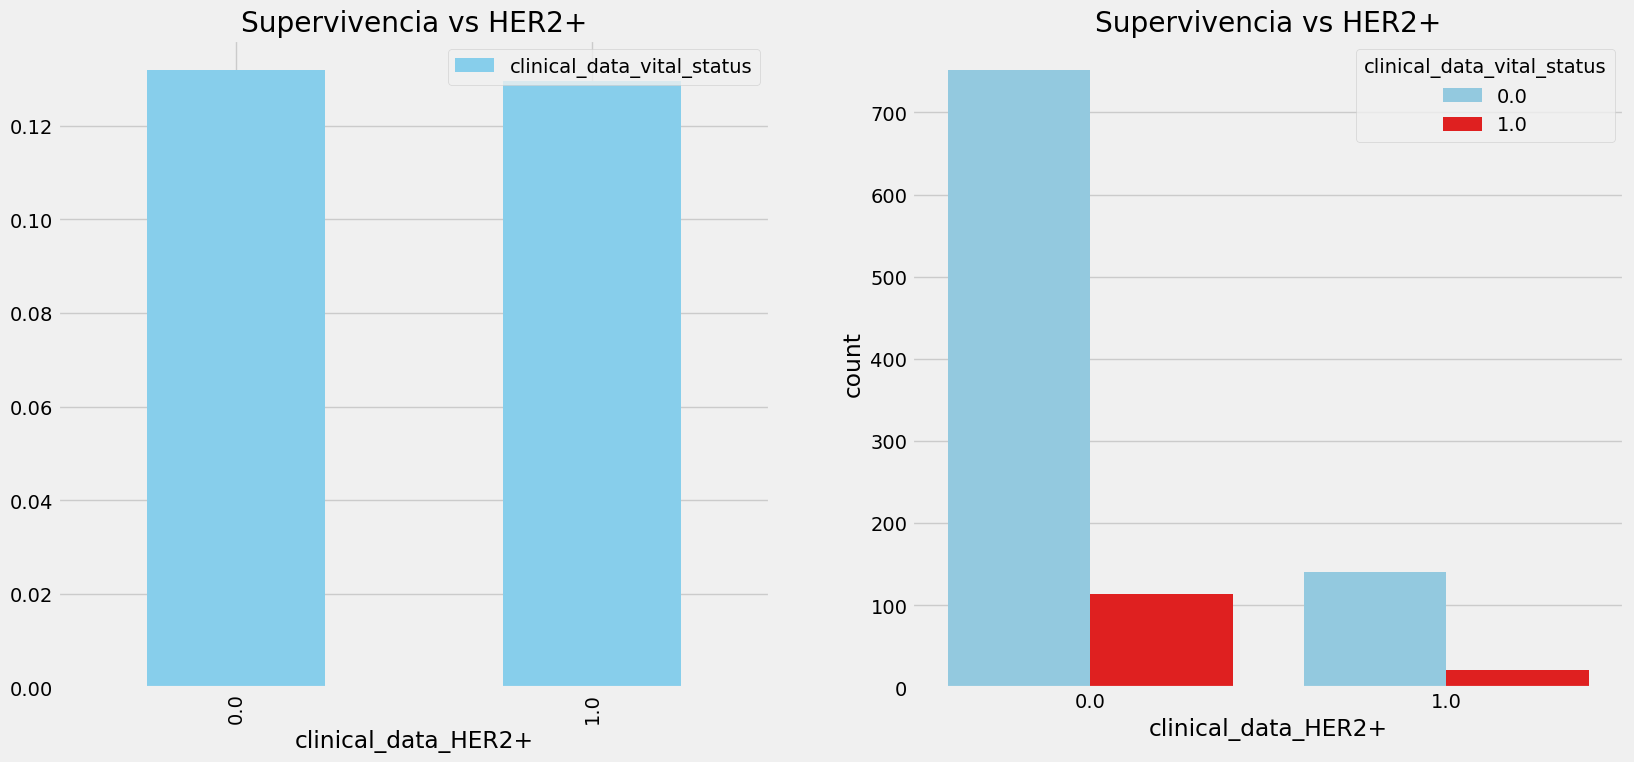

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la paleta de colores
colors = ["skyblue", "red"]

# Gráfico de barras
sns.set_palette(colors)
f, ax = plt.subplots(1, 2, figsize=(18, 8))
BRCA[['clinical_data_HER2+', 'clinical_data_vital_status']].groupby(['clinical_data_HER2+']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Supervivencia vs HER2+')

# Countplot
sns.countplot(x='clinical_data_HER2+', hue='clinical_data_vital_status', data=BRCA, ax=ax[1])
ax[1].set_title('Supervivencia vs HER2+')

# Mostrar los gráficos
plt.show()


In [28]:
BRCA.groupby(['clinical_data_HER2+','clinical_data_vital_status'])['clinical_data_vital_status'].count()

clinical_data_HER2+  clinical_data_vital_status
0.0                  0.0                           751
                     1.0                           114
1.0                  0.0                           141
                     1.0                            21
Name: clinical_data_vital_status, dtype: int64

In [29]:
import pandas as pd

# Agrupar y contar los valores
count_table = pd.crosstab(index=[BRCA['clinical_data_HER2+'], BRCA['clinical_data_vital_status']], columns="Count")

# Mostrar la tabla
print(count_table)


col_0                                           Count
clinical_data_HER2+ clinical_data_vital_status       
0.0                 0.0                           751
                    1.0                           114
1.0                 0.0                           141
                    1.0                            21


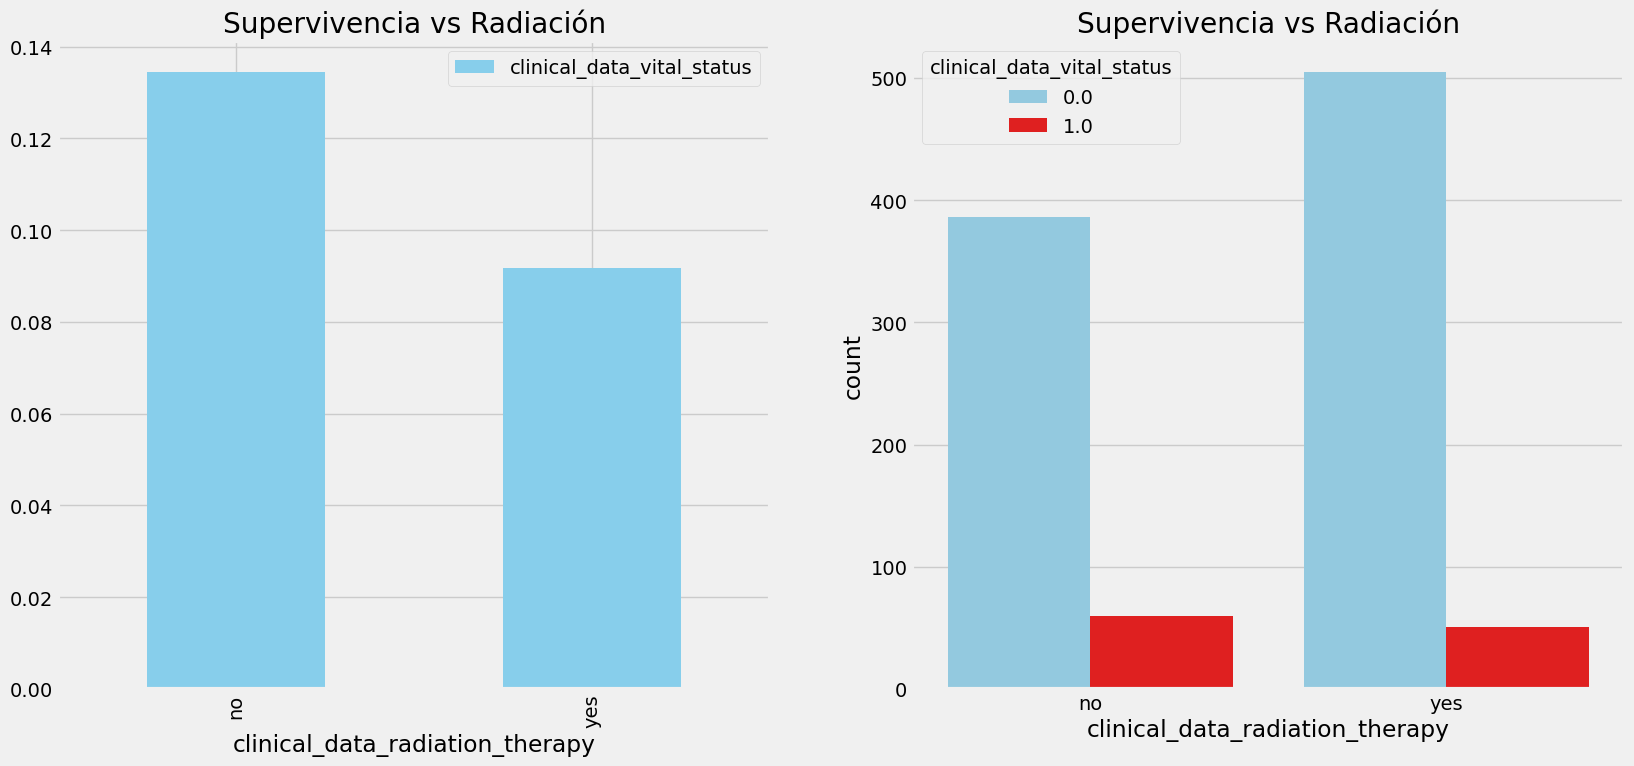

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la paleta de colores
colors = ["skyblue", "red"]

# Gráfico de barras
sns.set_palette(colors)
f, ax = plt.subplots(1, 2, figsize=(18, 8))
BRCA[['clinical_data_radiation_therapy', 'clinical_data_vital_status']].groupby(['clinical_data_radiation_therapy']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Supervivencia vs Radiación')

# Countplot
sns.countplot(x='clinical_data_radiation_therapy', hue='clinical_data_vital_status', data=BRCA, ax=ax[1])
ax[1].set_title('Supervivencia vs Radiación')

# Mostrar los gráficos
plt.show()


In [31]:
import pandas as pd

# Agrupar y contar los valores
count_table = pd.crosstab(index=[BRCA['clinical_data_radiation_therapy'], BRCA['clinical_data_vital_status']], columns="Count")

# Mostrar la tabla
print(count_table)


col_0                                                       Count
clinical_data_radiation_therapy clinical_data_vital_status       
no                              0.0                           386
                                1.0                            60
yes                             0.0                           505
                                1.0                            51


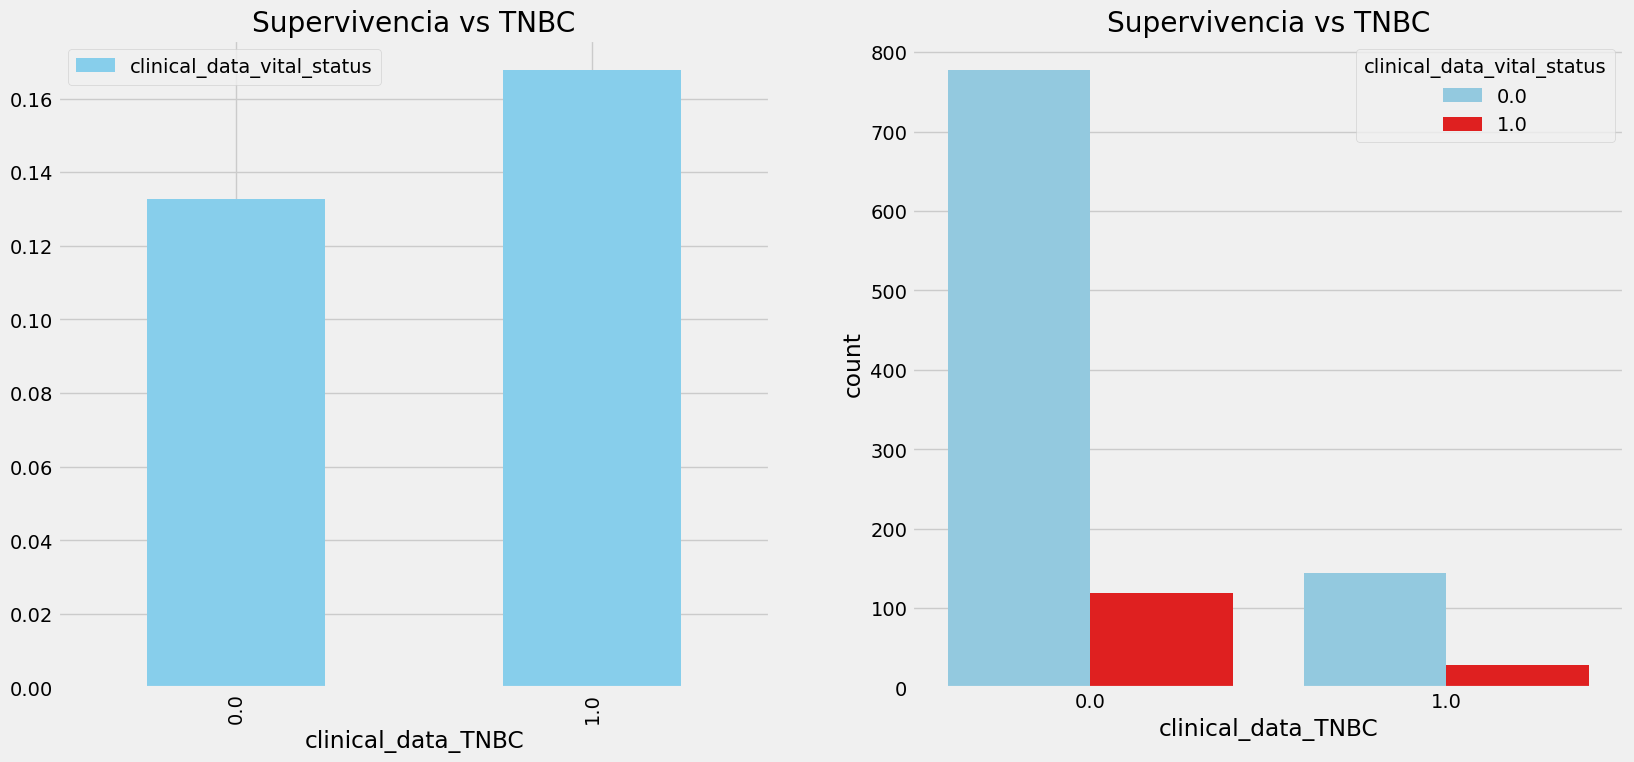

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la paleta de colores
colors = ["skyblue", "red"]

# Gráfico de barras
sns.set_palette(colors)
f, ax = plt.subplots(1, 2, figsize=(18, 8))
BRCA[['clinical_data_TNBC', 'clinical_data_vital_status']].groupby(['clinical_data_TNBC']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Supervivencia vs TNBC')

# Countplot
sns.countplot(x='clinical_data_TNBC', hue='clinical_data_vital_status', data=BRCA, ax=ax[1])
ax[1].set_title('Supervivencia vs TNBC')

# Mostrar los gráficos
plt.show()


In [33]:
import pandas as pd

# Agrupar y contar los valores
count_table = pd.crosstab(index=[BRCA['clinical_data_TNBC'], BRCA['clinical_data_vital_status']], columns="Count")

# Mostrar la tabla
print(count_table)


col_0                                          Count
clinical_data_TNBC clinical_data_vital_status       
0.0                0.0                           777
                   1.0                           119
1.0                0.0                           144
                   1.0                            29


In [34]:
BRCA.groupby(['clinical_data_radiation_therapy','clinical_data_vital_status'])['clinical_data_vital_status'].count()

clinical_data_radiation_therapy  clinical_data_vital_status
no                               0.0                           386
                                 1.0                            60
yes                              0.0                           505
                                 1.0                            51
Name: clinical_data_vital_status, dtype: int64

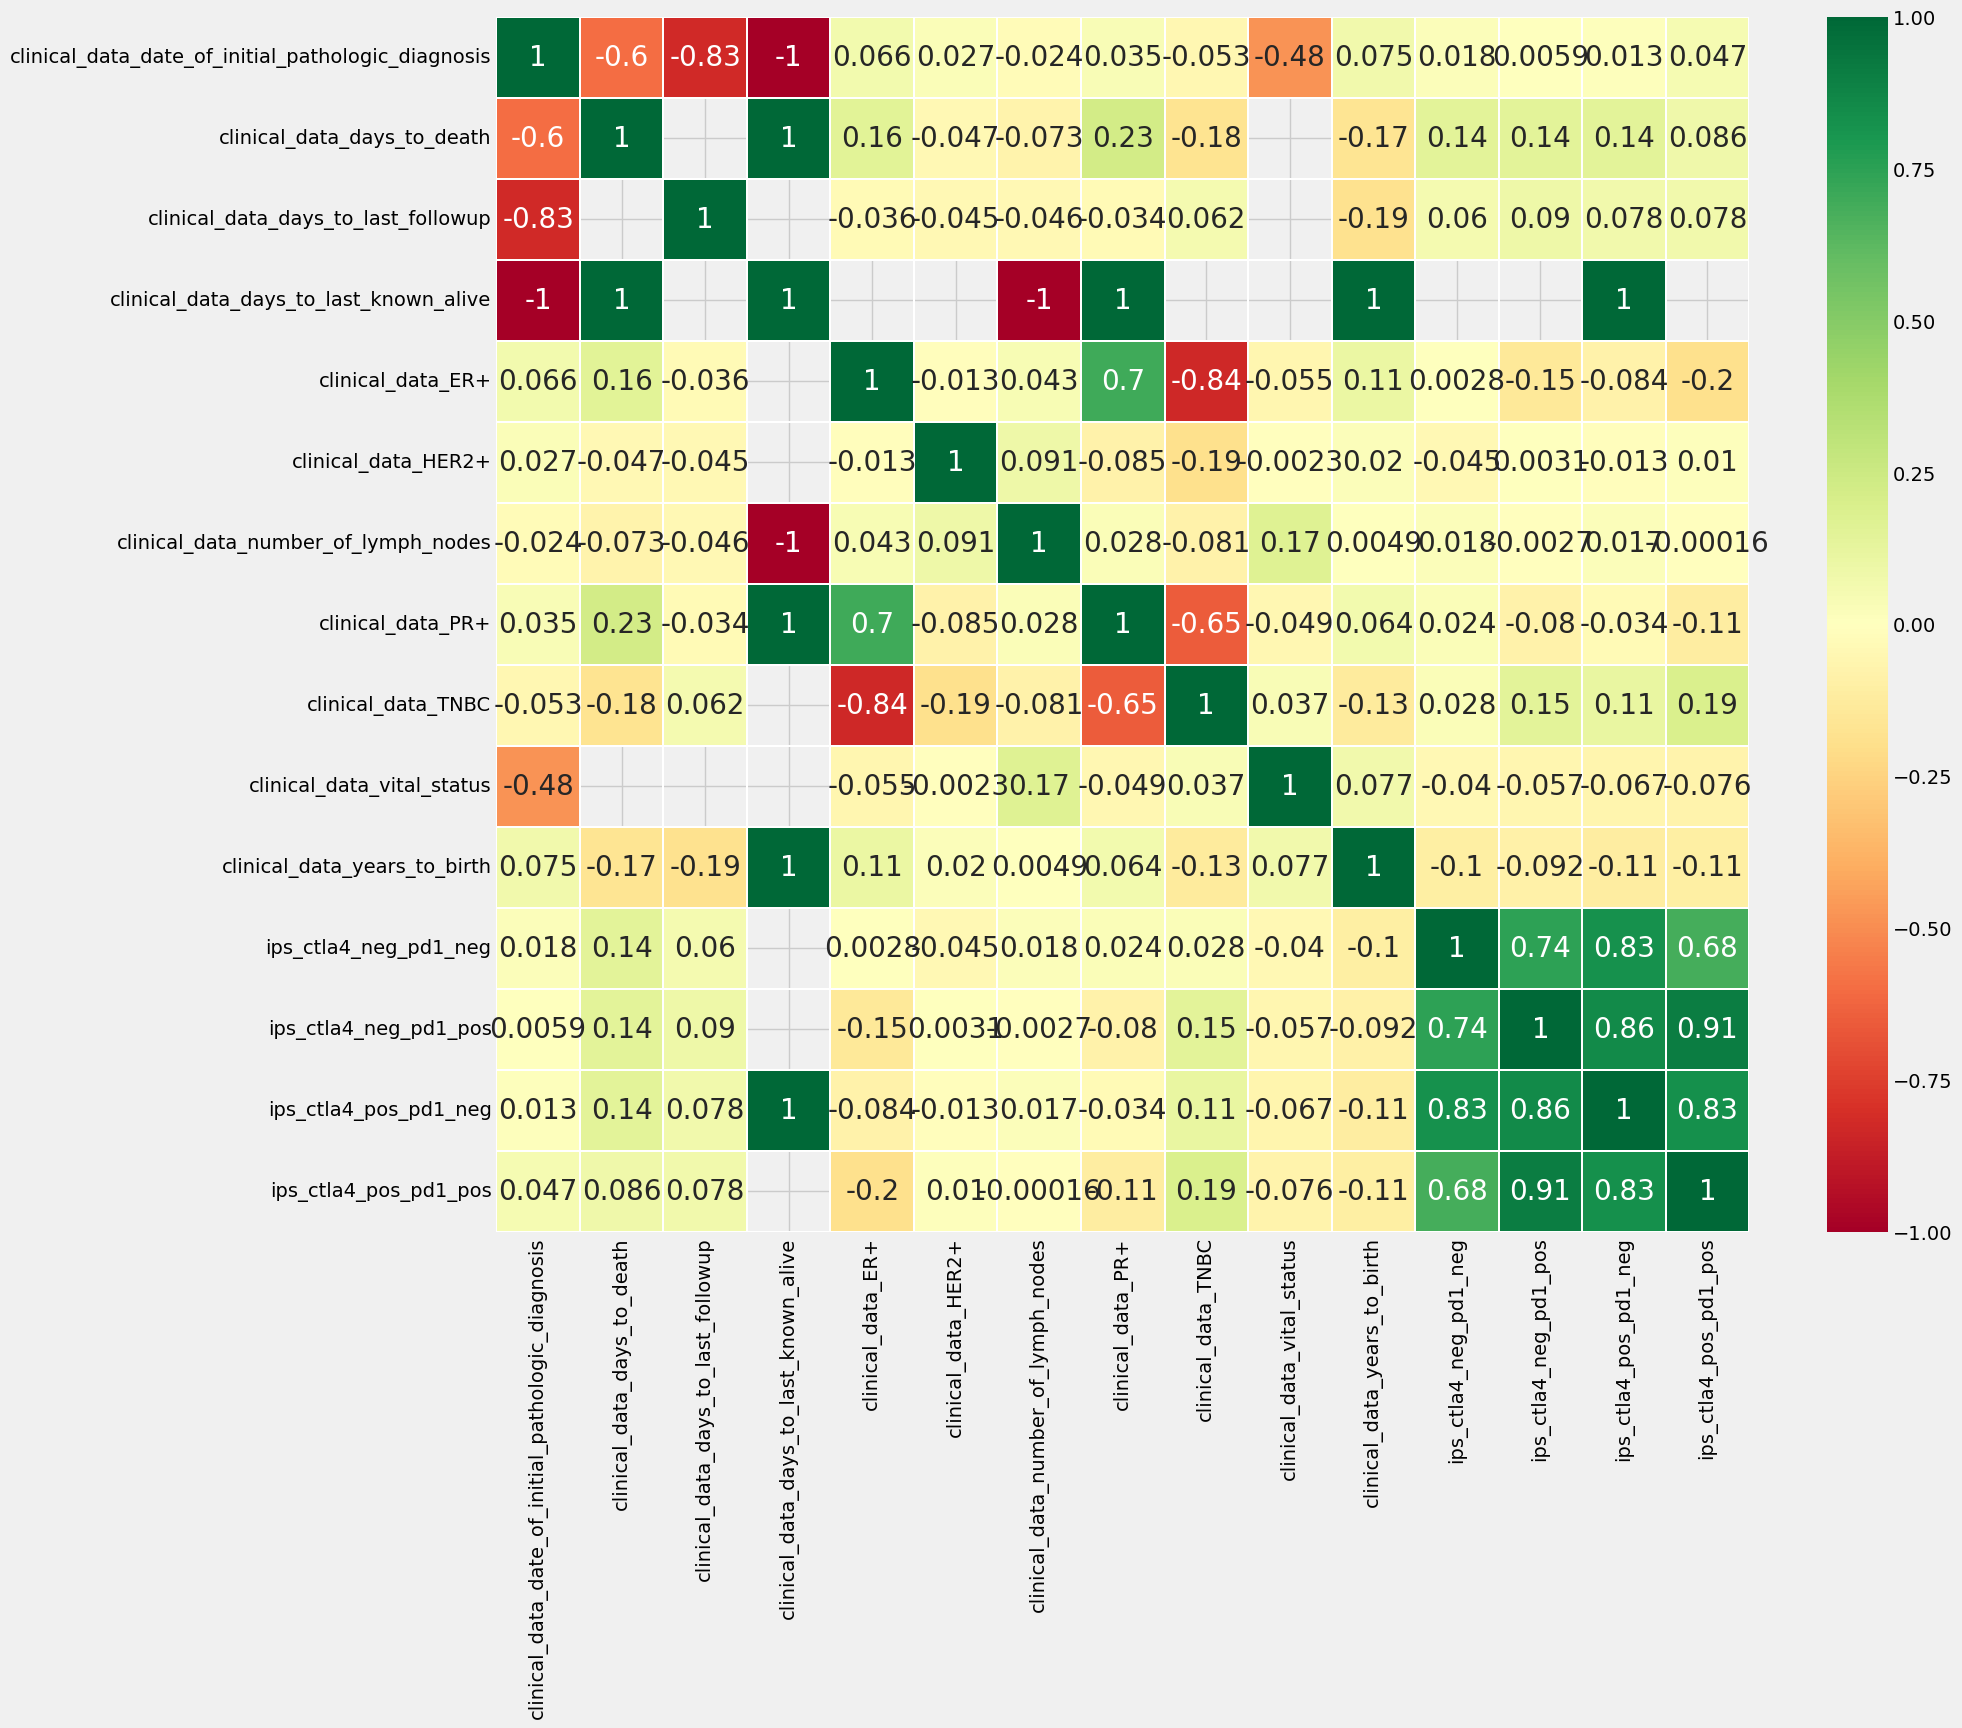

In [35]:
sns.heatmap(BRCA.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

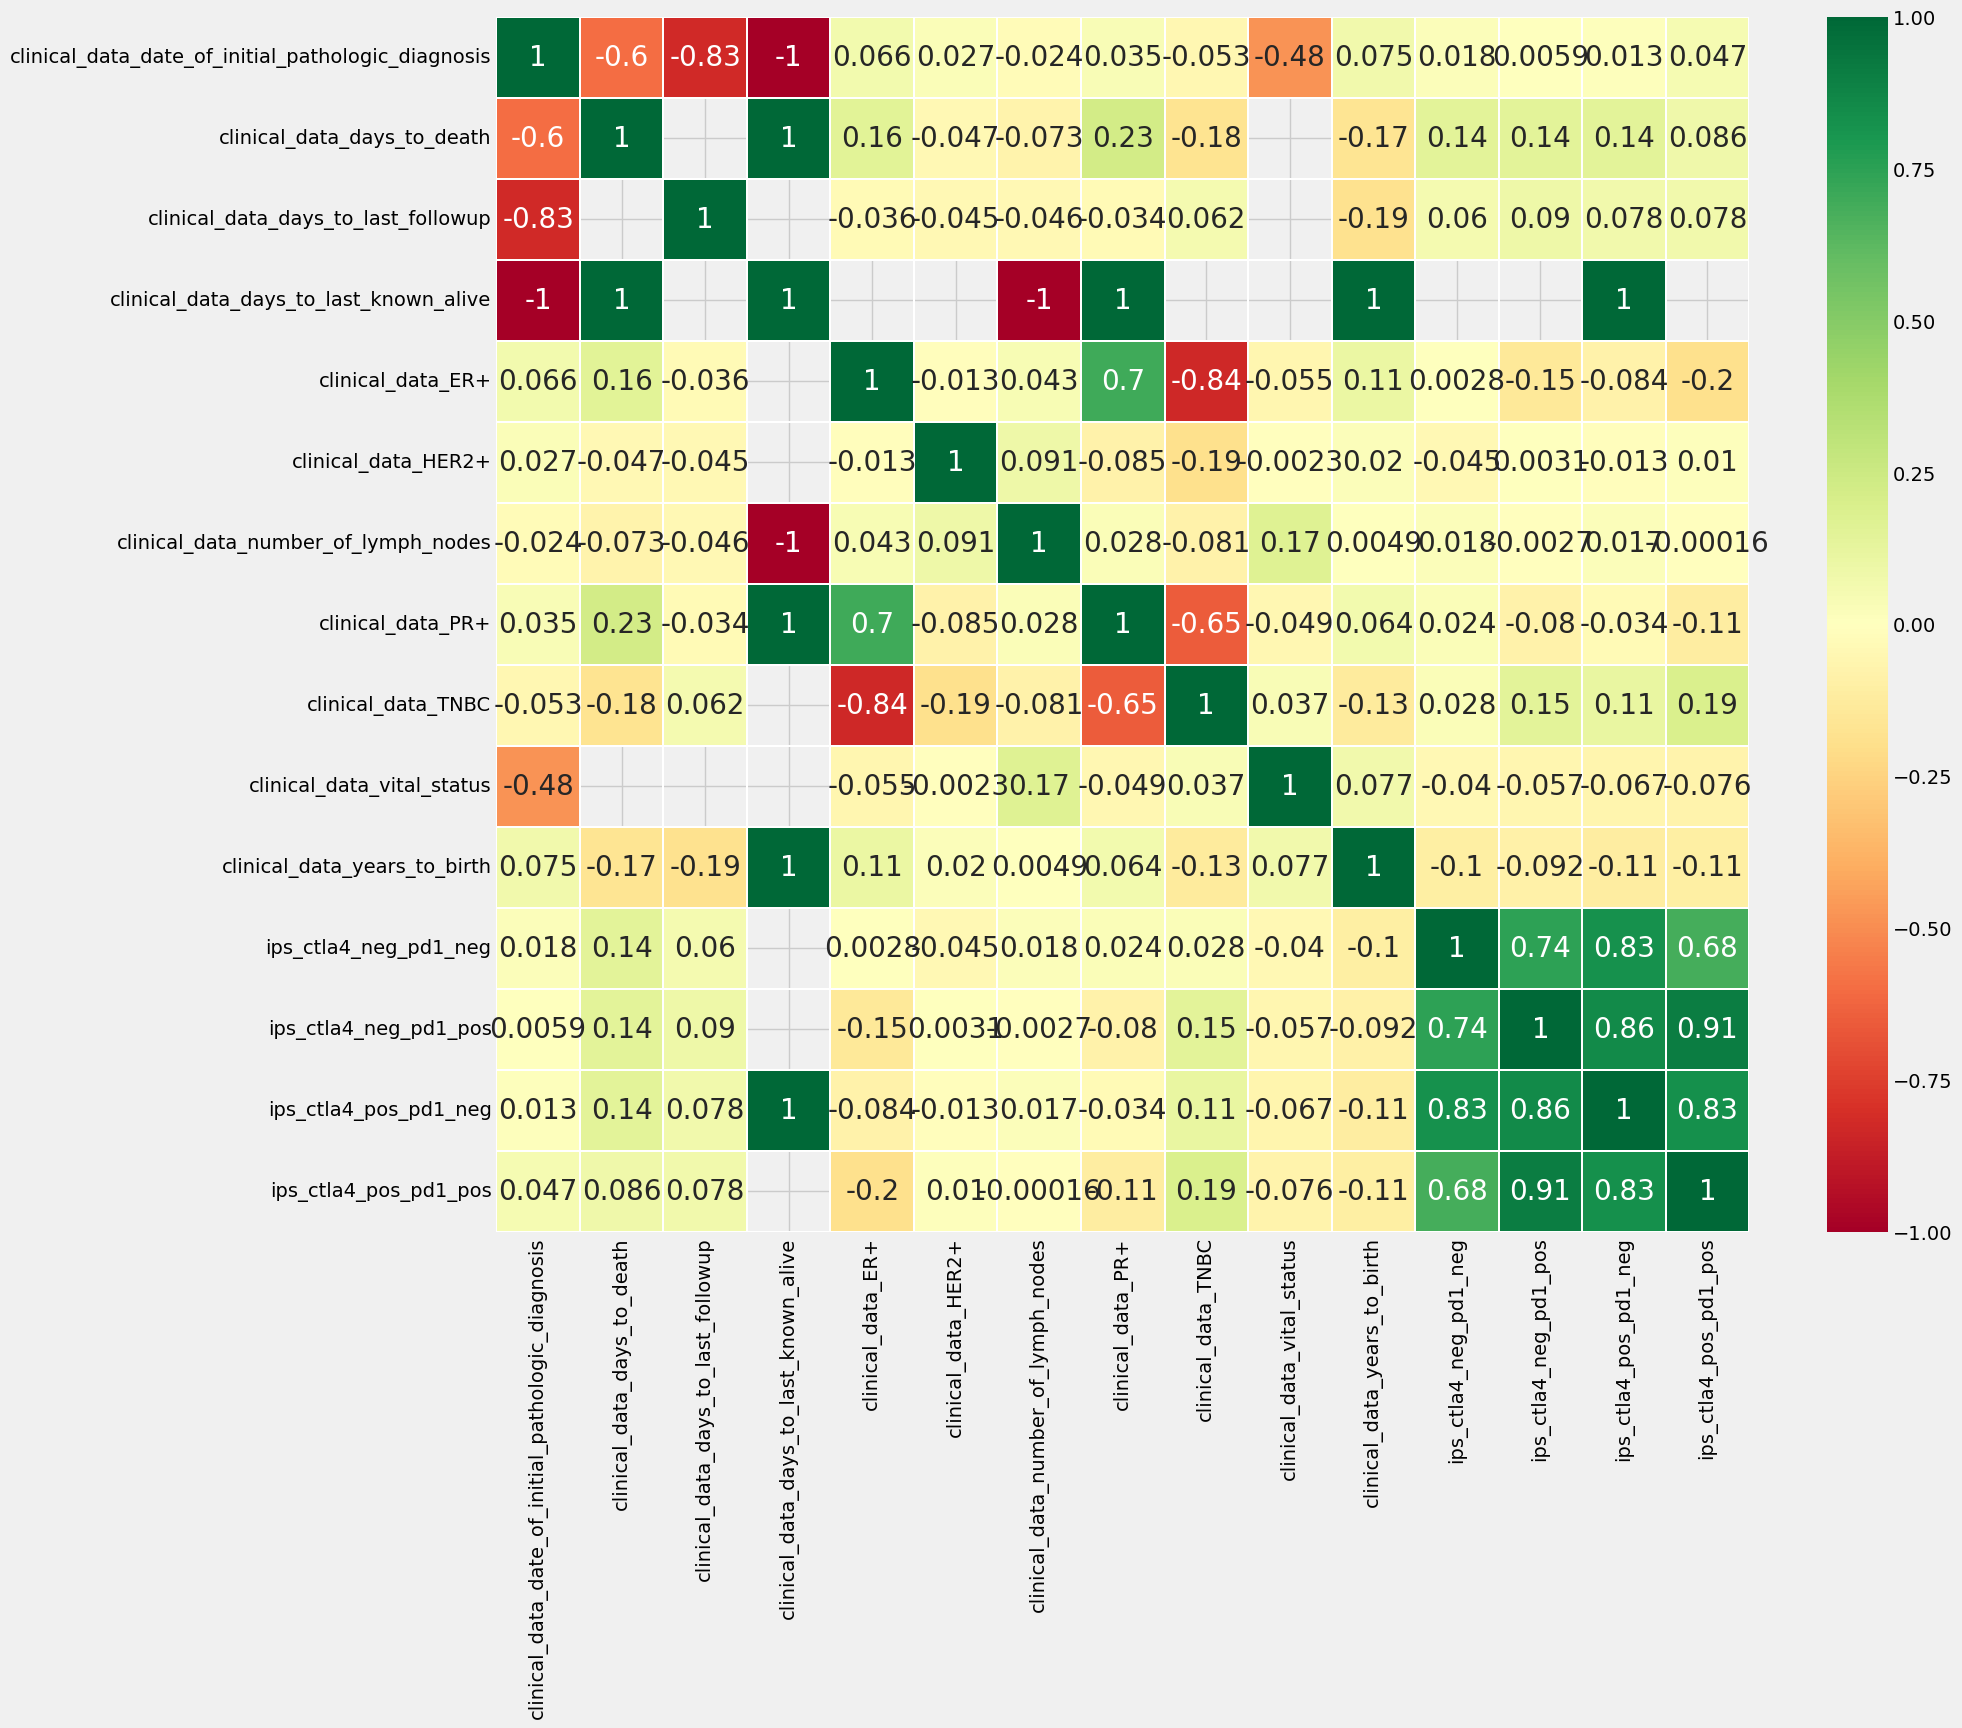

In [36]:
sns.heatmap(BRCA.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 3. Data Featuring

# 3.1Agrupar variable edad

In [37]:
 #Variable continua, hay que dividirla en grupos
print("Paciente de mayor edad:",BRCA['clinical_data_years_to_birth'].max(),"Años")
print("Paciente de menor edad:", BRCA['clinical_data_years_to_birth'].min(),"Años")
print("Edad media:",BRCA['clinical_data_years_to_birth'].mean(),"Años")

Paciente de mayor edad: 90.0 Años
Paciente de menor edad: 26.0 Años
Edad media: 58.59611829944547 Años


In [38]:
#Dividir edad en grupos. Edad máxima 90, edad mínima 26. Rango edad= [26-90]=64. 5 grupos de rango 13
#Feature engineering: Edad binning
BRCA['Edad_bin']=0
BRCA.loc[(BRCA['clinical_data_years_to_birth']>=26)&(BRCA['clinical_data_years_to_birth']<=39),'Edad_bin']=1
BRCA.loc[(BRCA['clinical_data_years_to_birth']>39)&(BRCA['clinical_data_years_to_birth']<=52),'Edad_bin']=2
BRCA.loc[(BRCA['clinical_data_years_to_birth']>52)&(BRCA['clinical_data_years_to_birth']<=65),'Edad_bin']=3
BRCA.loc[(BRCA['clinical_data_years_to_birth']>65)&(BRCA["clinical_data_years_to_birth"]<=78),'Edad_bin']=4
BRCA.loc[(BRCA['clinical_data_years_to_birth']>78)&(BRCA["clinical_data_years_to_birth"]<=90),'Edad_bin']=5                       


In [39]:
BRCA.groupby(['Edad_bin','clinical_data_vital_status'])['clinical_data_vital_status'].count()

Edad_bin  clinical_data_vital_status
0         0.0                            15
1         0.0                            62
          1.0                            12
2         0.0                           270
          1.0                            36
3         0.0                           339
          1.0                            43
4         0.0                           191
          1.0                            39
5         0.0                            68
          1.0                            22
Name: clinical_data_vital_status, dtype: int64

<Axes: xlabel='Edad_bin', ylabel='Density'>

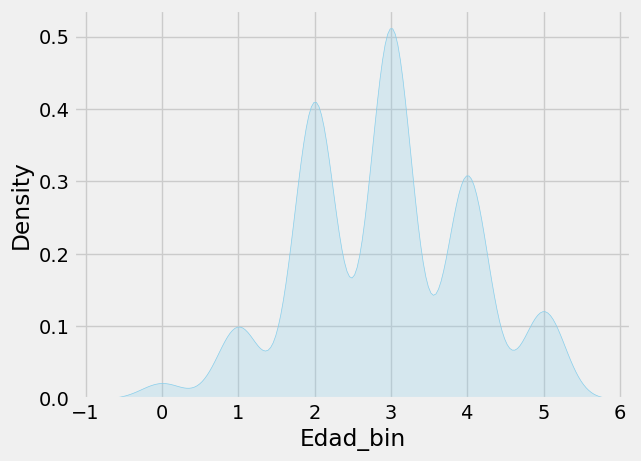

In [40]:
sns.kdeplot(BRCA["Edad_bin"], shade=True)

In [41]:
BRCA['Edad_bin'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Edad_bin
3,382
2,306
4,230
5,90
1,74
0,16


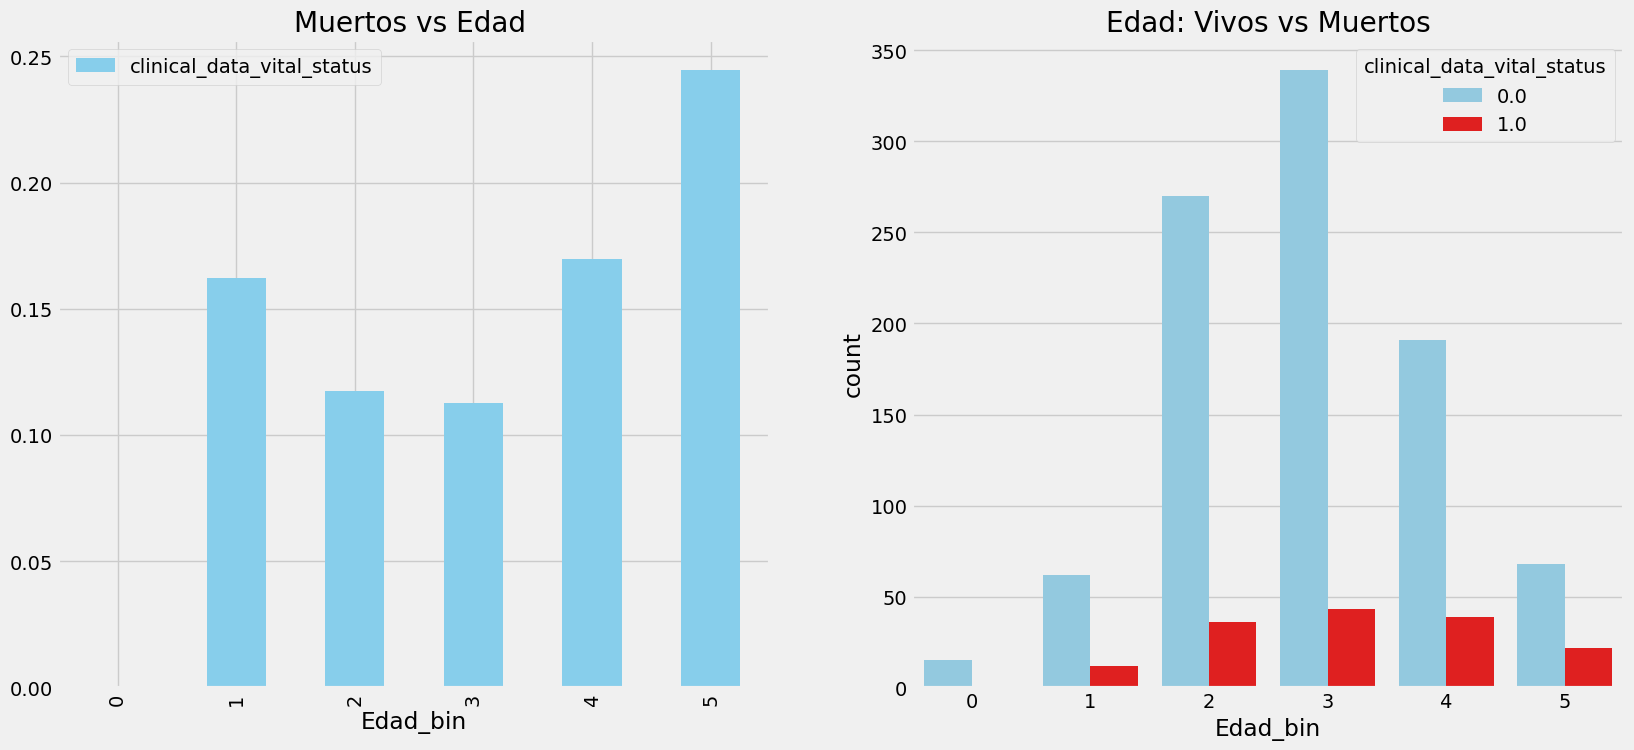

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,8))
BRCA[['Edad_bin','clinical_data_vital_status']].groupby(['Edad_bin']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Muertos vs Edad ')
sns.countplot(x='Edad_bin',hue='clinical_data_vital_status',data=BRCA,ax=ax[1])
ax[1].set_title('Edad: Vivos vs Muertos')
plt.show()

Fecha de diagnóstico

In [43]:
#Variable continua, hay que dividirla en grupos
print("Fecha mas tardía:",BRCA['clinical_data_date_of_initial_pathologic_diagnosis'].max(),"Años")
print("Fecha mas temprana:", BRCA['clinical_data_date_of_initial_pathologic_diagnosis'].min(),"Años")
print("Fecha media:",BRCA['clinical_data_date_of_initial_pathologic_diagnosis'].mean(),"Años")

Fecha mas tardía: 2013.0 Años
Fecha mas temprana: 1988.0 Años
Fecha media: 2007.8730593607306 Años


In [44]:
#Dividir fecha en grupos. Fecha, edad mínima 26. Rango edad= [26-90]=64. 5 grupos de rango 13
#Feature engineering: Edad binning
BRCA['Fecha diagnóstico_bin']=0
BRCA.loc[(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']>=1988)&(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']<=1993),'Fecha diagnóstico_bin']=1
BRCA.loc[(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']>1993)&(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']<=1998),'Fecha diagnóstico_bin']=2
BRCA.loc[(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']>1998)&(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']<=2003),'Fecha diagnóstico_bin']=3
BRCA.loc[(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']>2003)&(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']<=2008),'Fecha diagnóstico_bin']=4
BRCA.loc[(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']>2008)&(BRCA['clinical_data_date_of_initial_pathologic_diagnosis']<=2013),'Fecha diagnóstico_bin']=5                       


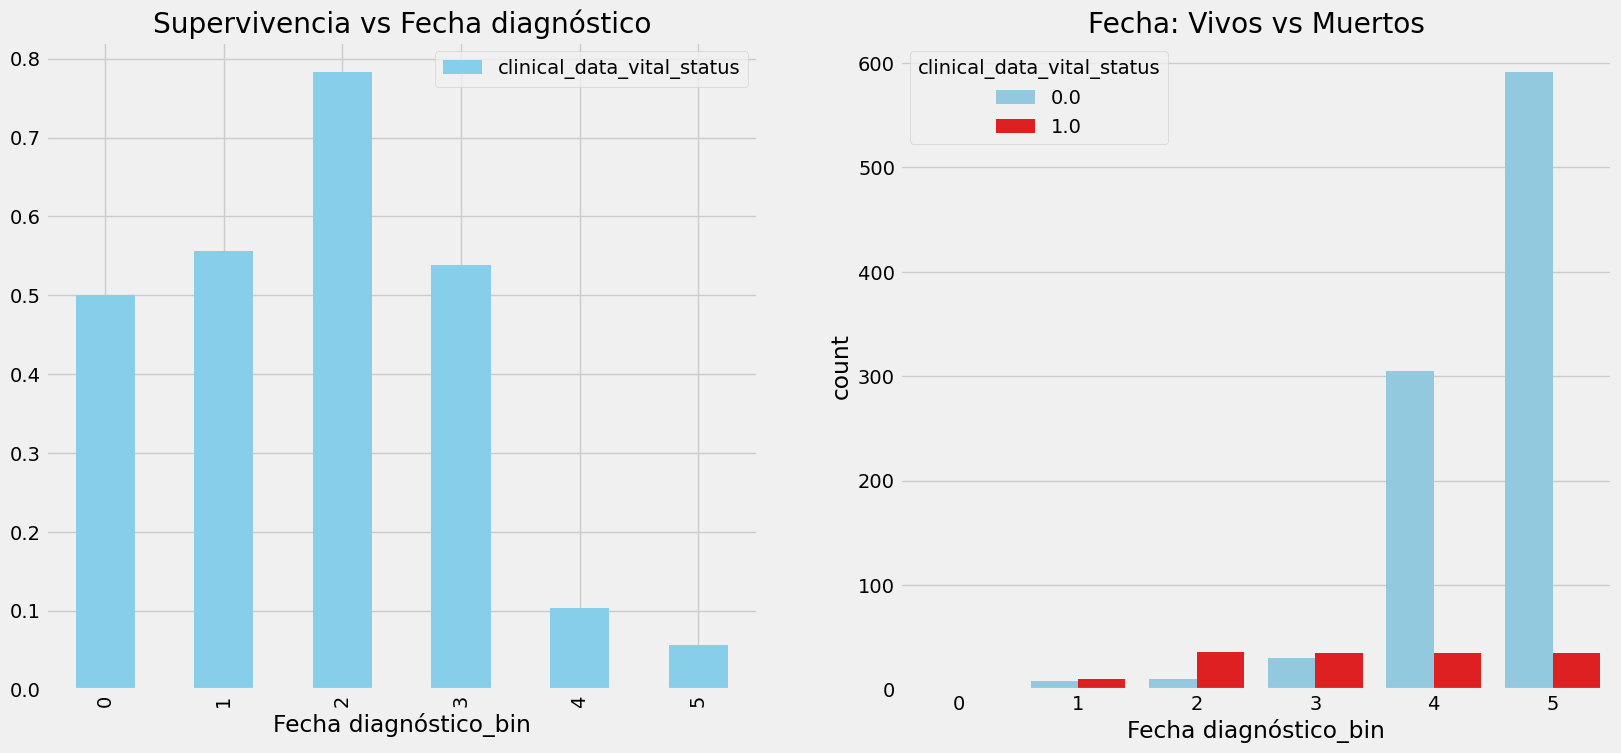

In [45]:
f,ax=plt.subplots(1,2,figsize=(18,8))
BRCA[['Fecha diagnóstico_bin','clinical_data_vital_status']].groupby(['Fecha diagnóstico_bin']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Supervivencia vs Fecha diagnóstico')
sns.countplot(x='Fecha diagnóstico_bin',hue='clinical_data_vital_status',data=BRCA,ax=ax[1])
ax[1].set_title('Fecha: Vivos vs Muertos')
plt.show()

<Axes: xlabel='Fecha diagnóstico_bin', ylabel='Density'>

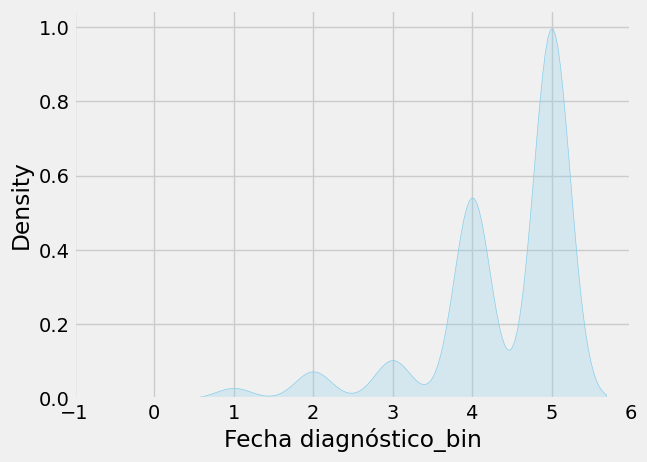

In [46]:
sns.kdeplot(BRCA["Fecha diagnóstico_bin"], shade=True)

In [47]:
BRCA['Fecha diagnóstico_bin'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Fecha diagnóstico_bin
5,626
4,340
3,65
2,46
1,18
0,3


# 3.2 Convertir string to numeric

In [48]:
# Raza--> Numeric values
BRCA['clinical_data_race'].replace(['american indian or alaska native','white',"black or african american","asian"],[1,2,3,4],inplace=True)
#Radiación-->Numeric values
BRCA["clinical_data_radiation_therapy"].replace(["no","yes"],[0,1],inplace=True)
#PAM50MRNA
BRCA["clinical_data_PAM50MRNA"].replace(["Basal","Her2","LumA","LumB","Normal"],[1,2,3,4,5], inplace=True)

In [49]:
#ARREGLAR ESTO, NO APARECE UN VALOR Y NO SÉ CUAL ES CUAL
BRCA['clinical_data_PAM50MRNA'].value_counts().to_frame().style.background_gradient(cmap='summer')

,clinical_data_PAM50MRNA
3.000000,305
4.000000,253
1.000000,228
2.000000,145
5.000000,136


In [50]:
BRCA['clinical_data_race'].value_counts().to_frame().style.background_gradient(cmap='summer')

,clinical_data_race
2.000000,757
3.000000,183
4.000000,61
1.000000,1


In [51]:
BRCA['clinical_data_radiation_therapy'].value_counts().to_frame().style.background_gradient(cmap='summer')

,clinical_data_radiation_therapy
1.000000,556
0.000000,446


In [52]:
BRCA["Fecha diagnóstico_bin"].value_counts().to_frame().style.background_gradient(cmap='summer')

,Fecha diagnóstico_bin
5,626
4,340
3,65
2,46
1,18
0,3


# 3.3 Eliminar columnas 

In [53]:
print("Columnas antes de eliminar:")
print(BRCA.columns)

Columnas antes de eliminar:
Index(['clinical_data_date_of_initial_pathologic_diagnosis',
       'clinical_data_days_to_death', 'clinical_data_days_to_last_followup',
       'clinical_data_days_to_last_known_alive', 'clinical_data_ER+',
       'clinical_data_ethnicity', 'clinical_data_gender',
       'clinical_data_HER2+', 'clinical_data_number_of_lymph_nodes',
       'clinical_data_PAM50MRNA', 'clinical_data_pathologic_stage',
       'clinical_data_pathology_M_stage', 'clinical_data_pathology_N_stage',
       'clinical_data_pathology_T_stage', 'clinical_data_PR+',
       'clinical_data_race', 'clinical_data_radiation_therapy',
       'clinical_data_TNBC', 'clinical_data_vital_status',
       'clinical_data_years_to_birth', 'ips_ctla4_neg_pd1_neg',
       'ips_ctla4_neg_pd1_pos', 'ips_ctla4_pos_pd1_neg',
       'ips_ctla4_pos_pd1_pos', 'Edad_bin', 'Fecha diagnóstico_bin'],
      dtype='object')


In [54]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [55]:
# Obtener el número de filas y columnas para el DataFrame BRCA
num_filas_brca, num_columnas_brca = BRCA.shape

# Imprimir la información
print(f'Número de filas en BRCA: {num_filas_brca}')
print(f'Número de columnas en BRCA: {num_columnas_brca}')


Número de filas en BRCA: 1098
Número de columnas en BRCA: 26


In [56]:
from tabulate import tabulate

# Imprimir las columnas antes de eliminar
print("Columnas antes de eliminar:")
print(tabulate(BRCA.columns.to_frame().reset_index(), headers=["Índice", "Columna"], tablefmt="pretty"))


Columnas antes de eliminar:
+----+----------------------------------------------------+----------------------------------------------------+
|    |                       Índice                       |                      Columna                       |
+----+----------------------------------------------------+----------------------------------------------------+
| 0  | clinical_data_date_of_initial_pathologic_diagnosis | clinical_data_date_of_initial_pathologic_diagnosis |
| 1  |            clinical_data_days_to_death             |            clinical_data_days_to_death             |
| 2  |        clinical_data_days_to_last_followup         |        clinical_data_days_to_last_followup         |
| 3  |       clinical_data_days_to_last_known_alive       |       clinical_data_days_to_last_known_alive       |
| 4  |                 clinical_data_ER+                  |                 clinical_data_ER+                  |
| 5  |              clinical_data_ethnicity               |         

In [57]:
BRCA.drop (['clinical_data_date_of_initial_pathologic_diagnosis','clinical_data_days_to_death','clinical_data_days_to_last_followup','clinical_data_days_to_last_known_alive','clinical_data_ethnicity','clinical_data_gender','clinical_data_number_of_lymph_nodes','clinical_data_pathologic_stage','clinical_data_pathology_M_stage','clinical_data_pathology_N_stage','clinical_data_pathology_T_stage','clinical_data_years_to_birth', 'ips_ctla4_neg_pd1_neg', 'ips_ctla4_neg_pd1_pos', 'ips_ctla4_pos_pd1_neg','ips_ctla4_pos_pd1_pos'],axis=1, inplace=True)


In [58]:
print ("Columnas después de eliminar")
print (BRCA.columns)

Columnas después de eliminar
Index(['clinical_data_ER+', 'clinical_data_HER2+', 'clinical_data_PAM50MRNA',
       'clinical_data_PR+', 'clinical_data_race',
       'clinical_data_radiation_therapy', 'clinical_data_TNBC',
       'clinical_data_vital_status', 'Edad_bin', 'Fecha diagnóstico_bin'],
      dtype='object')


# Eliminar valores NA

In [59]:
BRCA.isnull(). sum()

clinical_data_ER+                  78
clinical_data_HER2+                71
clinical_data_PAM50MRNA            31
clinical_data_PR+                  81
clinical_data_race                 96
clinical_data_radiation_therapy    96
clinical_data_TNBC                 29
clinical_data_vital_status          1
Edad_bin                            0
Fecha diagnóstico_bin               0
dtype: int64

In [60]:
#NAs en TNBC= 0, NO SON TNBC
#NAs en ER, PR Y HER2=0, no dan el perfil hormonal
#NAs en radiation= no (0), se sobreentiende que no recibieron, se habría registrado en el hospital
#NAs en race= eliminar o sobreponer white
#NAs en vital_status= valor 0
BRCA['clinical_data_TNBC'].fillna(0,inplace=True)
BRCA['clinical_data_ER+'].fillna(0,inplace=True)
BRCA["clinical_data_race"].fillna(2, inplace=True)
BRCA["clinical_data_radiation_therapy"].fillna(0, inplace=True)
BRCA["clinical_data_vital_status"].fillna(0, inplace=True)
BRCA["clinical_data_HER2+"].fillna(0, inplace=True)
BRCA["clinical_data_PR+"].fillna(0,inplace=True)
BRCA["clinical_data_PAM50MRNA"].fillna(3, inplace=True)

In [61]:
BRCA.isnull(). sum()

clinical_data_ER+                  0
clinical_data_HER2+                0
clinical_data_PAM50MRNA            0
clinical_data_PR+                  0
clinical_data_race                 0
clinical_data_radiation_therapy    0
clinical_data_TNBC                 0
clinical_data_vital_status         0
Edad_bin                           0
Fecha diagnóstico_bin              0
dtype: int64

# 4. Creación del modelo predictivo


# 4.1 Division test-train

In [62]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import accuracy_score

In [63]:
train=BRCA.drop(["clinical_data_vital_status"],axis=1)
test=BRCA["clinical_data_vital_status"]

In [64]:
X_train, X_test, y_train, y_test= train_test_split(train, test,test_size=0.2)




ValueError: Could not interpret input 'clinical_data_ER+'

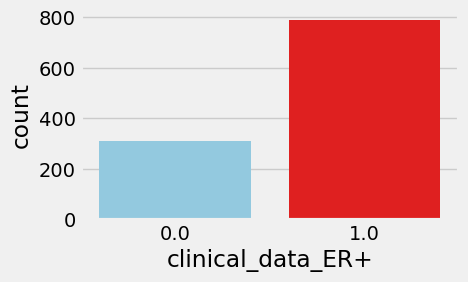

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Colores azul celeste y rojo
colors = ["skyblue", "red"]

# Iterar sobre cada variable
for i, column in enumerate(BRCA.columns):
    # Countplot para la variable en X_train y X_test
    plt.subplot(5, 4, i+1)
    sns.countplot(x=column, data=train, palette=colors, label='Train')
    sns.countplot(x=column, data=test, palette=colors, label='Test')
    plt.title(column)
    plt.legend()

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [67]:
#rbf-SVM
modelo2=svm.SVC(kernel='rbf',C=1,gamma=0.1)
modelo2.fit(X_train,y_train)
prediccion=modelo2.predict(X_test)

precisión=accuracy_score(y_test, prediccion)
precisión


0.8954545454545455

In [68]:
#linear-SVm
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.8863636363636364


In [69]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.9090909090909091


In [70]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.8681818181818182


In [71]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.9


In [72]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction7=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.8954545454545455


In [73]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.9136363636363637


Hacemos la K-fold para correr varias veces los modelos y agrupar las diferencias, así podemos escoger el modelo más consistente.

In [74]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,train,test, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.884345,0.034479
Radial Svm,0.886163,0.034772
Logistic Regression,0.893445,0.032284
KNN,0.895254,0.037580
Decision Tree,0.861551,0.033042
Naive Bayes,0.893470,0.029250
Random Forest,0.884345,0.034493


<Axes: >

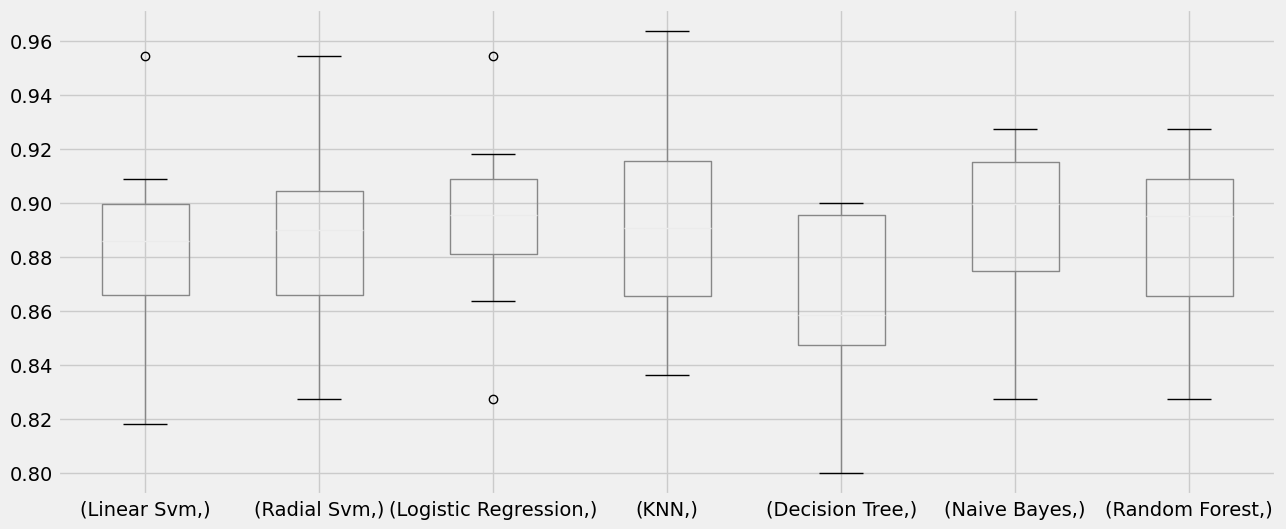

In [75]:
plt.subplots(figsize=(14,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

# 4.3 Matriz de confusión:
Nos da el número de clasificaciones correctas e incorrectas llevadas a cabo por el algoritmo

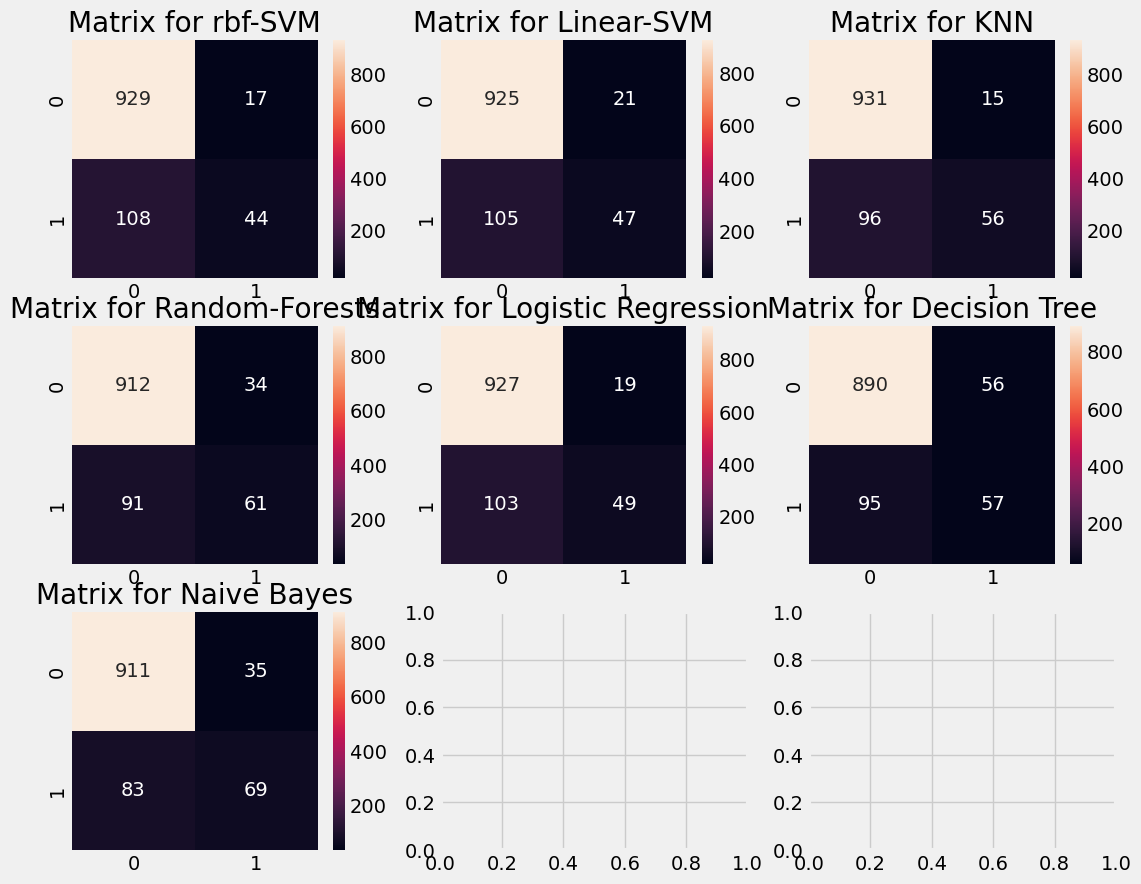

In [76]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),train,test,cv=10)
sns.heatmap(confusion_matrix(test,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),train,test,cv=10)
sns.heatmap(confusion_matrix(test,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),train,test,cv=10)
sns.heatmap(confusion_matrix(test,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),train,test,cv=10)
sns.heatmap(confusion_matrix(test,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),train,test,cv=10)
sns.heatmap(confusion_matrix(test,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),train,test,cv=10)
sns.heatmap(confusion_matrix(test,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),train,test,cv=10)
sns.heatmap(confusion_matrix(test,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [77]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Lista de clasificadores
classifiers = [
    SVC(kernel='rbf'),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=9),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB()
]

# Etiquetas para las matrices
titles = [
    'Matrix for rbf-SVM',
    'Matrix for Linear-SVM',
    'Matrix for KNN',
    'Matrix for Random-Forests',
    'Matrix for Logistic Regression',
    'Matrix for Decision Tree',
    'Matrix for Naive Bayes'
]

# Realizar bucle sobre los clasificadores y visualizar las matrices de confusión con métricas adicionales
for clf, title in zip(classifiers, titles):
    y_pred = cross_val_predict(clf, train, test, cv=10)
    conf_mat = confusion_matrix(test, y_pred)
    
    # Calcular métricas adicionales
    precisión = accuracy_score(test, y_pred)
    sensibilidad = recall_score(test, y_pred)
    especificidad = precision_score(test, y_pred)
    
    # Imprimir la matriz de confusión
    print(f"\n{title}\n")
    for row in conf_mat:
        print(" ".join(map(str, row)))
    
    # Imprimir métricas adicionales
    print(f"\nPrecisión: {precisión:.4f}")
    print(f"Sensibilidad y (Recall)w: {sensibilidad:.4f}")
    print(f"Especificidad (Precision): {especificidad:.4f}\n")



Matrix for rbf-SVM

929 17
108 44

Precisión: 0.8862
Sensibilidad y (Recall)w: 0.2895
Especificidad (Precision): 0.7213


Matrix for Linear-SVM

925 21
105 47

Precisión: 0.8852
Sensibilidad y (Recall)w: 0.3092
Especificidad (Precision): 0.6912


Matrix for KNN

931 15
96 56

Precisión: 0.8989
Sensibilidad y (Recall)w: 0.3684
Especificidad (Precision): 0.7887


Matrix for Random-Forests

913 33
87 65

Precisión: 0.8907
Sensibilidad y (Recall)w: 0.4276
Especificidad (Precision): 0.6633


Matrix for Logistic Regression

927 19
103 49

Precisión: 0.8889
Sensibilidad y (Recall)w: 0.3224
Especificidad (Precision): 0.7206


Matrix for Decision Tree

892 54
93 59

Precisión: 0.8661
Sensibilidad y (Recall)w: 0.3882
Especificidad (Precision): 0.5221


Matrix for Naive Bayes

911 35
83 69

Precisión: 0.8925
Sensibilidad y (Recall)w: 0.4539
Especificidad (Precision): 0.6635



KNN ensembled modelo final

In [80]:
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict((n_estimators=100),train,test,cv=10)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2147029640.py, line 2)

# 4.4 Hyper-parameters tuning

KNN

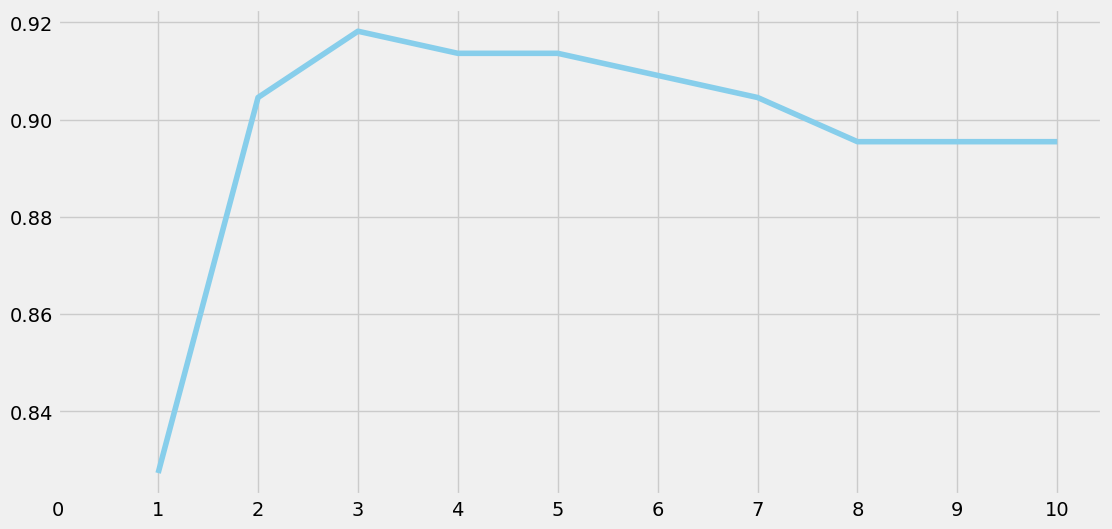

Precisión para diferentes valores de n: [0.82727273 0.90454545 0.91818182 0.91363636 0.91363636 0.90909091
 0.90454545 0.89545455 0.89545455 0.89545455] el valor máximo es:  0.9181818181818182


In [81]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Precisión para diferentes valores de n:',a.values,'el valor máximo es: ',a.values.max())

# 4.5 Ensembling por Bagging para K-neighbours

Cogemos este modelo de ensembling porque se puede emplear con modelos de K-n con valores de n_neighbours pequeños

In [82]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=1000)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,train,test,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

probabilities = model.predict_proba(X_test)[:, 1]




The accuracy for bagged KNN is: 0.9181818181818182
The cross validated score for bagged KNN is: 0.9007506255212677


In [83]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

# Entrenar el modelo Bagging
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
prediction = model.predict(X_test)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, prediction)

# Calcular la sensibilidad y especificidad
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Matriz de Confusión:")
print(conf_matrix)
print("\nSensibilidad:", sensitivity)
print("Especificidad:", specificity)

# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, prediction))

# Aplicar validación cruzada para obtener predicciones y evaluar la sensibilidad y especificidad promedio
cv_predictions = cross_val_predict(model, X_train, y_train, cv=10)
cv_conf_matrix = confusion_matrix(y_train, cv_predictions)

cv_true_negative, cv_false_positive, cv_false_negative, cv_true_positive = cv_conf_matrix.ravel()

cv_sensitivity = cv_true_positive / (cv_true_positive + cv_false_negative)
cv_specificity = cv_true_negative / (cv_true_negative + cv_false_positive)

print("\nMatriz de Confusión (Validación Cruzada):")
print(cv_conf_matrix)
print("\nSensibilidad (Validación Cruzada):", cv_sensitivity)
print("Especificidad (Validación Cruzada):", cv_specificity)


Matriz de Confusión:
[[187   2]
 [ 16  15]]

Sensibilidad: 0.4838709677419355
Especificidad: 0.9894179894179894

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       189
         1.0       0.88      0.48      0.62        31

    accuracy                           0.92       220
   macro avg       0.90      0.74      0.79       220
weighted avg       0.92      0.92      0.91       220


Matriz de Confusión (Validación Cruzada):
[[740  17]
 [ 77  44]]

Sensibilidad (Validación Cruzada): 0.36363636363636365
Especificidad (Validación Cruzada): 0.9775429326287979


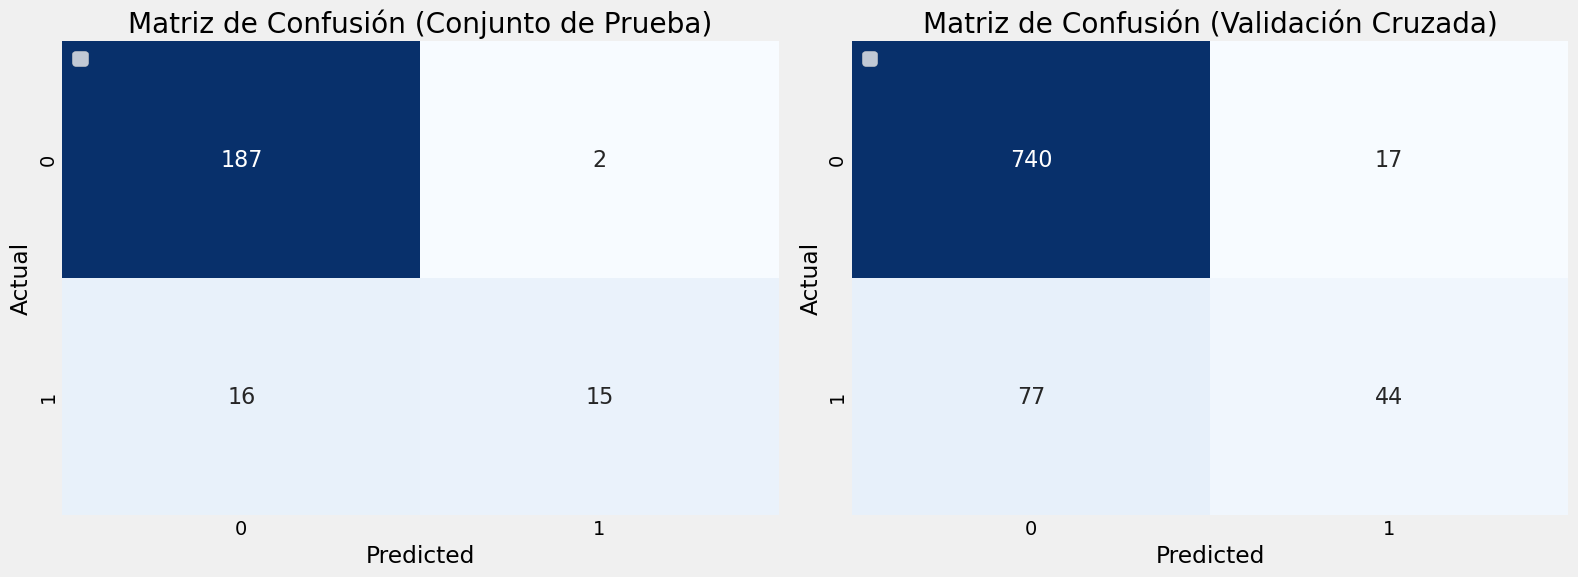

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(16, 6))

# Crear un subplot para la matriz de confusión del conjunto de prueba
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión (Conjunto de Prueba)')
plt.legend(['Negative', 'Positive'], loc='upper left')  # Añadir leyenda

# Crear un subplot para la matriz de confusión de la validación cruzada
plt.subplot(1, 2, 2)
sns.heatmap(cv_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión (Validación Cruzada)')
plt.legend(['Negative', 'Positive'], loc='upper left')  # Añadir leyenda

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 5. ROC y Kaplan-Meier

# 5.1 Curva ROC y AUC

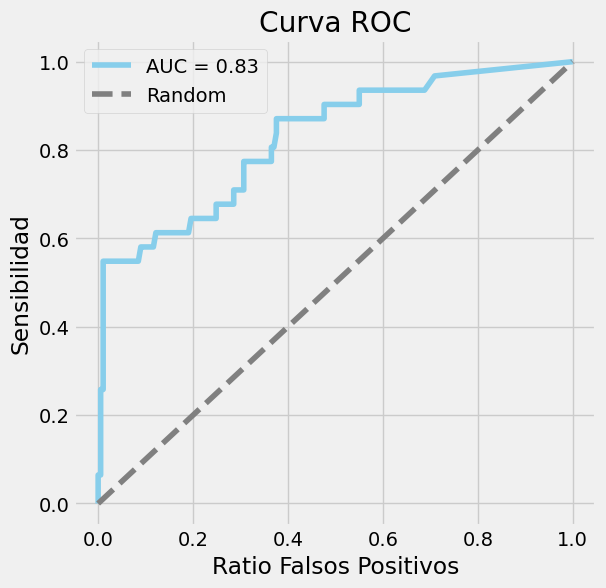

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Entrenar el modelo Bagging
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=1000)
model.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
probabilities = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calcular el área bajo la curva (AUC)
auc = roc_auc_score(y_test, probabilities)

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('Ratio Falsos Positivos')
plt.ylabel("Sensibilidad")
plt.title('Curva ROC')
plt.legend()
plt.show()


# 5.2 Kaplan-Meier estimator

El Kaplan-Meir mide representa tiempo hasta un evento, para ello necesito no eliminar en mi base de datos el clinical_data_days_to_death y posiblemente el clinical_data_days_to_last_followup.



# Curva de aprendizaje

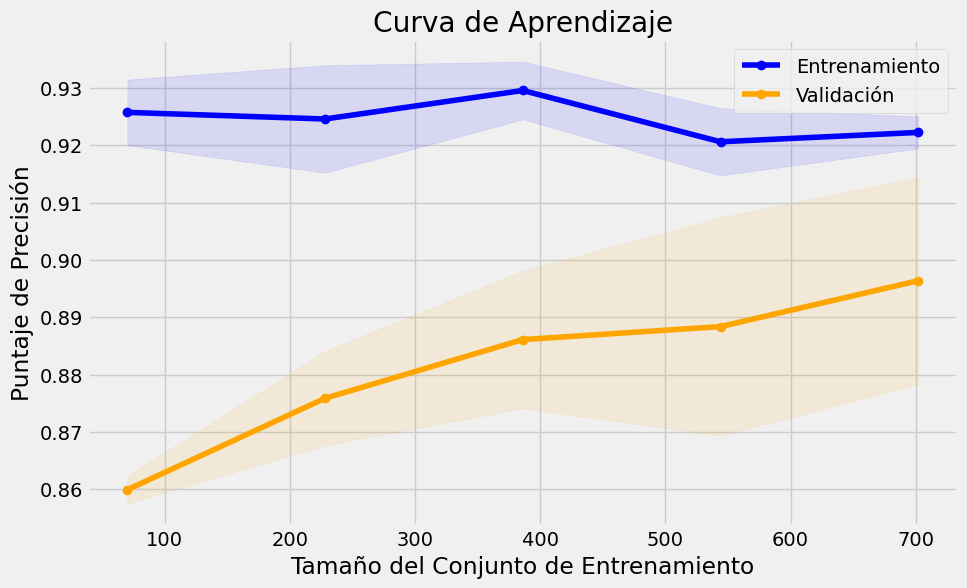

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Supongamos que tienes tus conjuntos de entrenamiento X_train, y_train

# Define tu modelo
model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=1000)

# Crea la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calcula las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Validación")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje de Precisión")
plt.legend(loc="best")
plt.show()


# 5.3 Modelo de COX 

In [ ]:
pip install lifelines

In [87]:

import pandas as pd
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

# Crear un objeto CoxPHFitter
coxph = CoxPHFitter()

# Ajustar el modelo de riesgos proporcionales de Cox al conjunto de datos

coxph.fit(BRCA, duration_col='Fecha diagnóstico_bin', event_col='clinical_data_vital_status')

#Imprimir estadísticas del modelo
coxph.print_summary()
# Graficar la función de supervivencia estimada
coxph.plot_survival_function()


<lifelines.CoxPHFitter: fitted with 1098 total observations, 946 right-censored observations>
             duration col = 'Fecha diagnóstico_bin'
                event col = 'clinical_data_vital_status'
      baseline estimation = breslow
   number of observations = 1098
number of events observed = 152
   partial log-likelihood = -1018.27
         time fit was run = 2024-04-05 14:56:12 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
clinical_data_ER+                -0.33       0.72       0.29            -0.90             0.23                 0.41                 1.26
clinical_data_HER2+              -0.06       0.94       0.25            -0.54             0.43                 0.58                 1.53
clinical_data_PAM50MRNA          -0.02       0.98       0.08            -0.18             0.14                 0.84                 1.15
clinical_data_PR+                -0.04       0.96       0.25            -0.53             0.44                 0.59                 1.55
clinical_data_race               -0.28       0.75       0.16            -0.60             0.03                 0.55                 1.03
clinical_data_radiation_therapy  -0.73       0.48       0.17            -1.07            -0.39                 0.34                 0.68
clinical_data_TNBC                0.02       1.02       0.30            -0.57             0.62                 0.57                 1.85
Edad_bin                          0.14       1.16       0.08            -0.00             0.29                 1.00                 1.34

                                  cmp to     z      p   -log2(p)
covariate                                                       
clinical_data_ER+                   0.00 -1.15   0.25       2.00
clinical_data_HER2+                 0.00 -0.24   0.81       0.30
clinical_data_PAM50MRNA             0.00 -0.21   0.83       0.26
clinical_data_PR+                   0.00 -0.18   0.86       0.22
clinical_data_race                  0.00 -1.79   0.07       3.76
clinical_data_radiation_therapy     0.00 -4.17 <0.005      15.03
clinical_data_TNBC                  0.00  0.08   0.94       0.10
Edad_bin                            0.00  1.90   0.06       4.11
---
Concordance = 0.63
Partial AIC = 2052.53
log-likelihood ratio test = 32.08 on 8 df
-log2(p) of ll-ratio test = 13.44

AttributeError: CoxPHFitter has no attribute 'plot_survival_function'